In [1]:
# Importing necessary packages
import nltk
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Reading the Dataset

dataset = pd.read_csv("C:\\Users\\shrey\\OneDrive\\Desktop\\covid19_tweets.csv")


In [3]:
dataset.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

In [4]:
dataset.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [5]:
dataset.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [6]:
dataset ["source"].value_counts()

Twitter Web App              56891
Twitter for Android          40179
Twitter for iPhone           35472
TweetDeck                     8543
Hootsuite Inc.                7321
                             ...  
DataBlogger                      1
Dear_Assistant                   1
OnlyPultCom                      1
Washington Square Parkerz        1
Radiology: AI app                1
Name: source, Length: 610, dtype: int64

In [7]:
dataset ['source'].value_counts().nlargest(10)

Twitter Web App        56891
Twitter for Android    40179
Twitter for iPhone     35472
TweetDeck               8543
Hootsuite Inc.          7321
Twitter for iPad        4336
Buffer                  2728
Sprout Social           1833
Instagram               1759
IFTTT                   1545
Name: source, dtype: int64

<Figure size 720x720 with 0 Axes>

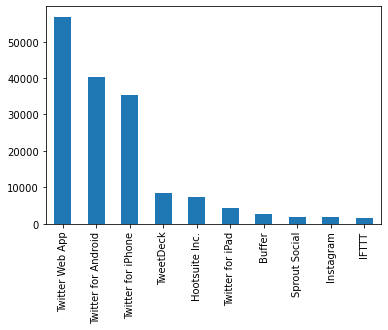

<Figure size 720x720 with 0 Axes>

In [8]:
#Plotting the tweets from top 10 sources

dataset ['source'].value_counts().nlargest(10).plot(kind = 'bar')
plt.figure(figsize = (10,10))

In [9]:
# Text Analysis 

import neattext.functions as nfx


In [10]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
# Reading 'text' for Cleaning
dataset ['text']

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

In [12]:
dataset['clean_tweet'] = dataset ['text'].apply (nfx.remove_userhandles)
dataset['clean_tweet'] = dataset ['clean_tweet'].apply (nfx.remove_hashtags)
dataset['clean_tweet'] = dataset ['clean_tweet'].apply (nfx.remove_urls)
dataset['clean_tweet'] = dataset ['clean_tweet'].apply (nfx.remove_multiple_spaces)
dataset['clean_tweet'] = dataset ['clean_tweet'].apply (nfx.remove_punctuations)
dataset['clean_tweet'].iloc [555] 

'The US Congress can investigate whatever they believe is necessary However it must exercise fairness and accuracy… '

In [13]:
#Comparing Original Tweets with the Data Cleaned

dataset[['text', 'clean_tweet']]

text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                              clean_tweet  
0       If I smelled the scent of hand sanitizers toda...  
1       Hey and  wouldnt it have made more sense to ha...  
2        Trump never once claimed was a hoax We all cl...  
3        The one gift has give me is an appreciation f...  
4                      25 July : Media Bulletin on Novel   
...                                                   ...  
179103  Thanks for nominating me for the challenge I n...  
179104                     2020 The year of insanity Lol   
179105   A powerful painting by Juan Lucena Its a trib...  
179106  More than 1200 students test positive for at m...  
179107                          I stop when I see a Stop   

[179108 rows x 2 columns]

Sentiment Analysis

In [14]:
from textblob import TextBlob

In [15]:

def get_sentiment (text):
    blob = TextBlob(text)
    
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
  
    if sentiment_polarity > 0:
        Sentiment_Label = 'Positive'
    elif sentiment_polarity < 0:
        Sentiment_Label = 'Negative'
    else:
        Sentiment_Label = 'Neutral'
    result = {'polarity': sentiment_polarity,
           'subjectivity': sentiment_subjectivity,
          'sentiment': Sentiment_Label}
    return result
    

In [16]:
ex1 = dataset['clean_tweet'].iloc[1]

In [17]:
get_sentiment(ex1)

{'polarity': 0.5, 'subjectivity': 0.5, 'sentiment': 'Positive'}

In [18]:
#Sentiment Analysis
dataset ['Sentiment_Label'] = dataset['clean_tweet'].apply(get_sentiment)

In [19]:
#Splitting the 'Sentiment_Label' Dataframe with Pandas

pd.json_normalize(dataset['Sentiment_Label'])

polarity  subjectivity sentiment
0      -0.250000      0.250000  Negative
1       0.500000      0.500000  Positive
2       0.000000      0.000000   Neutral
3       0.000000      0.357143   Neutral
4       0.000000      0.000000   Neutral
...          ...           ...       ...
179103  0.200000      0.200000  Positive
179104  0.800000      0.700000  Positive
179105  0.300000      1.000000  Positive
179106  0.263258      0.515152  Positive
179107  0.000000      0.000000   Neutral

[179108 rows x 3 columns]

In [20]:
dataset = dataset.join(pd.json_normalize(dataset['Sentiment_Label']))

In [21]:
#Reading the dataframe with polarity, subjectivity and sentiment score for each tweet 

dataset

user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   
4       🖊️Official Twitter handle of Department of Inf...   
...                                                   ...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea   
179104  When your cat has more baking soda than Ninja ...   
179105  ⚒️ The Architects of Free Trade ⚒️ Really Did ...   
179106  Global UX UI Visual Designer. StoryTeller, Mus...   
179107  TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...   

               user_created  user_followers  user_friends  user_favourites  \
0       2017-05-26 05:46:42             624           950            18775   
1       2009-04-16 20:06:23            2253          1677               24   
2       2009-02-28 18:57:41            9275          9525             7254   
3       2019-03-07 01:45:06             197           987             1488   
4       2017-02-12 06:45:15          101009           168              101   
...                     ...             ...           ...              ...   
179103  2013-12-30 18:59:19             412          1609             1062   
179104  2011-12-21 04:41:30             150           182             7295   
179105  2016-07-13 17:21:59            1623          2160            98000   
179106  2009-10-27 17:43:13            1338          1111                0   
179107  2018-04-14 17:30:07              97          1697              566   

        user_verified                 date  \
0               False  2020-07-25 12:27:21   
1                True  2020-07-25 12:27:17   
2               False  2020-07-25 12:27:14   
3               False  2020-07-25 12:27:10   
4               False  2020-07-25 12:27:08   
...               ...                  ...   
179103          False  2020-08-29 19:44:21   
179104          False  2020-08-29 19:44:16   
179105          False  2020-08-29 19:44:15   
179106          False  2020-08-29 19:44:14   
179107          False  2020-08-29 19:44:08   

                                                     text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                 hashtags               source  is_retweet  \
0                                     NaN   Twitter for iPhone       False   
1                                     NaN  Twitter for Android       False   
2                             ['COVID19']  Twitter for Android       False   
3       

In [22]:
dataset["sentiment"].value_counts()

Neutral     75490
Positive    74154
Negative    29464
Name: sentiment, dtype: int64

In [23]:
 # Analysising Negative Tweets

negative_tweets = dataset[ dataset['sentiment']== 'Negative']['clean_tweet']

C:\Users\shrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

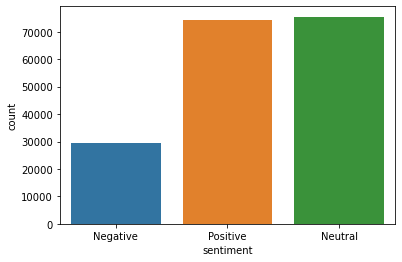

In [24]:
#Plotting the tweets according to their sentiment using seaborn

sns.countplot(dataset['sentiment'])

In [25]:
# Removing Stop words & Tokenization for Negative Tweets

clear_tweets = negative_tweets.apply(nfx.remove_stopwords).tolist()

In [26]:
clear_tweets

['smelled scent hand sanitizers today past think intoxicated that…',
 'deaths continue rise bad Politicians businesses want…',
 'image doesnt list source Id careful overall risk dying statistics related to…',
 'Im feeling little anxious detracted everyones…',
 'Britain didnt understand months plenty countries understand took effective…',
 'Crazy world come Americans fight this🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸',
 'sir mom ICU COVID want prayers listening',
 'aka Ill sending 500 people like amp retweet $300 $1500 Cas…',
 'time spike cases isvery hard reverse drastic lockdown time y…',
 'Hi long time preparation reopening homework',
 'OK Im angry believe stupidity virus kills must…',
 'weekend Yall pity year facing cant person…',
 'Shout Earth Hands worst reaction “emergency” I’ve seen Lottery shut and…',
 'Egyptians aint got shit',
 'Yes evidence increased Plus early guidance global PPE shortage priority to…',
 'Cum Check Ill DM Nudes',
 'worst type spread',
 'Agreed 💯% mean exactly problem travellers ❤️ needs

In [30]:
# Tokenization for the Negative Tweets

for line in clear_tweets:
    for token in line.split():
        print (token)

smelled
scent
hand
sanitizers
today
past
think
intoxicated
that…
deaths
continue
rise
bad
Politicians
businesses
want…
image
doesnt
list
source
Id
careful
overall
risk
dying
statistics
related
to…
Im
feeling
little
anxious
detracted
everyones…
Britain
didnt
understand
months
plenty
countries
understand
took
effective…
Crazy
world
come
Americans
fight
this🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸
sir
mom
ICU
COVID
want
prayers
listening
aka
Ill
sending
500
people
like
amp
retweet
$300
$1500
Cas…
time
spike
cases
isvery
hard
reverse
drastic
lockdown
time
y…
Hi
long
time
preparation
reopening
homework
OK
Im
angry
believe
stupidity
virus
kills
must…
weekend
Yall
pity
year
facing
cant
person…
Shout
Earth
Hands
worst
reaction
“emergency”
I’ve
seen
Lottery
shut
and…
Egyptians
aint
got
shit
Yes
evidence
increased
Plus
early
guidance
global
PPE
shortage
priority
to…
Cum
Check
Ill
DM
Nudes
worst
type
spread
Agreed
💯%
mean
exactly
problem
travellers
❤️
needs
educatin…
I’m
emotionally
exhausted
find
way
coming
soon
‼️
imaginego

social
services
protec…
Treat
single
decision
meet
LIFE
DEATH
decisions…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
mind
CDC
says
numbers
r
actually
10x
reported
lack
testing
weeks
resu…
Dept
health
taken
link
Covid
data
Replacing
public
information
ste…
mental
health
community
concern
impact
lack
inperson
s…
surprise
Spanish
Flu
100
times
deadly
times
worse
be…
Ioannidis
et
al
(2020)
claim
IFR
Spanish
Flu
~100
times
worse
th…
amp
assuming
youll
offering
masks
dont
cant
afford/are
unable
t…
Mental
Health
Crisis
Spreading
Faster
Infrastructure
Support
Government
Executive
72420
🚨🚨🚨🚨
73665
CASES
1
DAY
☠️
1241
DEAD
DEAD
DEAD
☠️
Prioritizing
Mental
Health
Returning
Work
|
renamed
“the
common
core
virus”
math
adding
size
protest
tripled
trump
fails
I…
144000+
dead
slowing
Thanks
Cat
caught
eating
residents
food
aged
care
home
Victoria
St
Basils…
VMC
Bans
idol
immersion
Dashama
ponds
lake
City
limits
Coronavirus
situation
issues
circ…
*TEST
track
trace*
start

assistance
৳
2500
help
survive
ha…
good
It’s
like
broken
leg
world
responds
appropriately
broken
mind
soul
hard
to…
Serving
Pride
Nile
Energy
Limited
inkind
contribution…
new
state
moved
fellowship
bored
Uworld
qu…
Active
surveillance
carried
slums
Bhubaneswar
city
slums
declared
containment…
worst
feelings
wear
mask
wake
blow
smelly
breath
god
help
Season
2
Tyler
Perrys
Sistas
expected
wrap
production
today
(article):
NEGROMANCER
20:
Negrom…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
daily
if…
Travel
order
Secretary
Pollack:
“travelers
responsibility
help
Commonwea…
|
179
TTD
employees
tested
positive
till
including
20
archakas
(priests)
several…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
buying
alcohol
Cashier
stares
mask
eyes
soul
left
Hits
visual
confirmatio…
CM
inaugurates
care
center
testing
lab
Dombivli
vid…
Schools
reopen
political
common
sense
❌🚸😷🤒
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
place


Chief
Minister
Uddhav
Thackeray
today
inaugurated
Care
Center
testing
lab
Dombivli
video
c…
🤬🤬🤬
UN
Unleashes
Army
Disinfo
Trolls
push
Big
Pharma
Bill
Gates
Narratives
Shut
Opposing
Voices…
sure
stand
leave
tiny
seaside
town
time
March
sure
feel
little
bit
nervous
if…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
temperature
doesnt
mean
357
active
cases
recorded
Victoria
today
city
Casey
reaching
149
remember
stay
home
s…
Menthol
chewing
gum
covid
mask
good
combo
Yup
rich
look
poor
choice
around…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Pls
sign
petition2help
safer4the
people
shielding
2at
shopping
I…
White
House
advisor
Dr
said
vaccine
likely
won’t
“widely
available…
govt
introduces
mandatory
negative
molecular
test
travellers
Bulgaria
amp
Romania
case…
TX
Wear
MASK
help
slow
spreading
help
save
lives
Avoid
shutdown
help
doctors
nurses…
IAM
HOUSE
🤴🏿👸🏿👊🏿
0/1=0
Dont
try
convince
cotton
came
Black
Seed
instead
t…
Help
slow
s

case
25
patients
dischar…
・・・
🇿🇼
clamp
fundamental
freedoms
including
freedom…
public
leisure
centres
England
remain
shut
funds
dry
⁦
Swedens
coronavirus
strategy
succeed
fail
BBC
Ne
Tired
Christians
risking
lives
middle
Churchgoers
DIED
Life
rental
Dems
Arizona
desperate
perp(s)
land
jail
long
time
ass…
Updates
India
July
25
2020
2:52
PM
Active
Cases
―
457448
Recovered
―
850303
Deceased
―
31425
Conf…
pristine
clear
blue
skies
C19
lockdown
days
slowly
filling
humankinds
pollution
more…
Idiotic
people
clueless
governance
lethal
combination
pandemic
Im
speaking
regards
government…
dont
knock
oftenbut
yesterday
123
people
died
amp
given
5
seconds
coverage…
lot
supporters
think
funny
probably
think
65000+
preventable
deaths
Fucking
hilar…
Listen
podcast
Prof
Ina
Rothman
shares
statistics
Mental
Health
South
African
workpl…
good
day
small
number
recoveries
it’s
better
Wednesday
GOV
pronounced
patient
dead
coz
Covid
deceased
family
said
died
stroke
GOV
asked
caus…
criminal
probably
asked
Zup

m…
Random
maybe
chances
longterm
asymptomatic
individual
lucky
enou…
Whats
missing
Europe
:
Temp
check
amp
Testing
spot
numbers
BAD
Rebekah
fired
publishing
REAL
numbers
Shes
kept
num…
Stable
1700
hospitalized
past
5
days
stable
271
people
died
you…
78412
Cases
sa
Pilipinas
today
expected
reach
85000+
end
month
Anong
sa
ti…
Punjab
records
12000
recoveries
past
24
hours
Participating
airing
complete
LIES
Dr
Fauci
outrageous
Dr
Fauci
create
C…
family
gardens
togetherdoesnt
kill
😬
✨
kids
younger
*…
China
actively
tackling
climate
change
implementing
Paris
Agreement
fighting
promoting…
Tiktok
fucking
life
don’t
tell
different
😆
center
refusing
calls
message
comes
saying
“call
time”…
people
dying
everyday
boasting
usual
assisting
Boris
Cummings
rewriting
history
ready
for…
Victoria
level
4
lockdown
late
June
cases
started
creeping
red
flags
t…
didnt
know
linked
thanks
setting
straight
fake
h…
Chinese
scientist
center
COVID19
origin
theories
speaks
|
Science
|
AAAS
people
bored
clapping
hand

COVID19
keeps
schools
shuttered:
POLL
|
|
|
students
future
state
country
victims
deadly
virus
an…
hard
presenter
trying
defend
government
doctor
handing
butt
o…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Income
inequality:
fix
$BTC
worst
come
failing
leadership
health
crisis
requires
multifaceted
response
stakes
alltime
high
failure
option
Azmin
Ali
Hideous
shameful
amp
dreadful
amp
deceitful
Parts
new
fake
“guidelines”
written
inexperienced
non…
gives
pushback
tell
Canada
14th
worst
county
the…
Mental
Health
Check🥰
Israels
Supreme
Court
ruled
Palestinian
prisoners
right
social
distancing
protection
c…
Hey
expert
come
job
day
deal
mentally
ill
patients
an…
okay
alcohol
ban
job
loss
cant
act
36m
people
driven
homes
leaving
vulnerable
gather
in…
jobs
livelihoods
threat
result
pandemic
absolutely
address
poverty
I…
UK
plans
green
recovery
Net
Zero
outlines
challenges
opportunities
facing
in…
Managing
period
regular
day
tough
frontline
healthcare
workers
m

chalk
air
game
Bc
obviously
hands
dirty
threw
po…
report
fatalities
single
day
KP
constable
succumbs
nigh…
Madhya
Pradesh:
Police
check
IDs
commuters
shops
closed
10day
begins
today
Bhopal
v…
spent
morning
talking
colleagues
Thankfully
needed
h…
Awful
reading
stripped
away
vestige
comfort
hold
close
Nagchandreshwar
Temple
Madhya
Pradesh
opened
year
occasion
year
to…
Dear
sister
know
dat
zoo
slave
media
fools
worse
than…
enforcing
10pm
curfew
social
distancing
mask
ordinance
espec…
Causes
19
comparison
Source
Credit:
Flourish
Ian
Barratt
16…
Im
ashamed
share
society
fails
connection
th…
Im
ashamed
share
society
fails
connection
attack…
Poor
illiterate
elderly
infants
etc
denied
access
testing
amp
treatment
bcoz
N…
Poor
weather
labour
shortages
hammering
BC’s
blueberry
growers
dealing
lower
yields
wo…
tell
individuals
arent
spreading
SERIOUSLY
want
know
think
Im
gonna
die
(and)
want
die
home
hospital
desperately
ill
woman
with…
17th
century
medical/surgical
face
masks
allegedly
doctors
c

countryIf
victims
deadly
virus
l…
dumbfounded
patient
advocate
wants
poor
die
Reminder:
research
cure
funded
t…
considered
fact
skeptic
afraid
risks
th…
students
future
state
country
victims
deadly
virus
an…
(DLSA)
Ramban
organised
day
long
medical
awareness
camp
corona
virus
People
drive
Hondas
worst
drivers
road
fail
follow
rules
road…
Detecting
Researchers
trained
dogs
sniff
infections
days
makes
worse
reducing
immunity
extra
care
people
alrea…
students
future
state
country
victims
deadly
virus
an…
students
future
state
country
victims
deadly
virus
and…
mention
abhorrent
lack
responsibility
response
killing
thousands
individuals
case
think
times
amp
little
stress
Monday…
students
future
state
country
victims
deadly
virus
and…
amp
expected
rise
outbreak…
reporting
1000
cases
past
days
heaved
sigh
relief
Friday
with…
rules:
bring
closer
tie
game
road
Joe
Maddon
students
future
state
countryIf
victims
deadly
virus
lo…
“if
diabetes
hypertension
cardiovascular
disease
probably
mor…
India

guidelines
target
enforcement
ramps
Heres
theyr…
said
2020
ACTUAL
fuck
HAHAHAHA
CROOK
DUMB
REGRETS
TWEETS
YO
1776
gimme
liberty
gimme
death:…
Nasdaq
Fall
Valuation
Stretched
Close
“Bubble”
Level
👈
click
link
India
UPDATE:
Total
Cases
1336861
Active
Cases
456071
Cured/Discharged
849431
Deaths
31…
Active
cases
increased
193
24
hours
80
hour
Info
provider:…
Grim
numbers
July
24
2020
July
Update:
situation
continues
grim
48916
new
cases
757
deaths
last…
Choti
Sarrdaarni
actor
says
saw
father
died
Coronavirus
|…
right
crime
century
illegal
use
use
Nazi
tacti…
Americas
coronavirus
response
Spanish
flu
response
disturbing
similar
Stop
propping
fake
economy
tax
dollars
Let
thing
know
people
don’t
want
to…
HAHAHAHA
CROOK
DUMB
REGRETS
TWEETS
YO
1776
gimme
liberty
gimme
death:…
crisis
forced
senior
sell
tea
native
Erode
district…
Staying
late
Listen
interactive
tonight
fillingin
with…
SENDING
SICK
PATIENTS
HOME
DIE
TODAY
PAYING
G…
2009:
Idiot
create
death
panel
decide
Americans
worth…
saying
foll

Cc:
hasnt
admitted
doesnt
know
*shit*
childrens
susceptibility
hundreds
gathered
faith
IDIOT
event
officials
ask
selfquarantine
G…
I’m
sad
stressed
overwhelmed
Recovering
double
mastectomy
reconstruction
STD
pay…
forced
watch
shows
thought
twice
I’ve
watched
ev…
sick
idea
amp
living
bit
gets
worse
a…
unsettling
example
deaths
account
complete
toll
attend
UNESCO’s
Builders
Universe
Camp
2
held
USA
couldnt
2
exci…
odd
reason
find
searching
reason
to…
There’s
block
party
going
street
100
people
attending
wants
to…
way
week’s
episode
definitely
talking
big
COVID19
t…
Created
Fake
Dr
Fauci
Twitter
Account
Getting
Absolutely
Owned
AntiMask
Karens
“suppression”
strategy
failed
strive
0
cases
it’s
unacceptable
people
p…
JUNE
⁦
requiring
masks
employees
training
That’s
criminal
hope
i…
rally
wear
mask
feel
eat
shit
hope
gagging
8
minutes
Floridian…
WTH
Unfortunately
Starr
County
Memorial
Hospital
limited
resources
doctors
going
ha…
AIIMS
Delhi
administered
1st
dose
Bharat
Biotech’s
Covaxin
vacc

Hurrica…
Lyin
Ted:
Certainly
wouldnt
want
turn
blind
eye
Trump
corruption
amp
incompete…
Highest
single
day
recovery
consecutive
day
34602
patients
discharged
24
hours
t…
way
download
raw
COVID19
data
(used
dashboard)
London
and…
youre
mad
Fauci
wearing
mask
photo
realize
people
mad
no…
9)
who’ve
complained
reporting
unduly
pessimistic
want
draw
attention
undeniably
posi…
read
Black
Lives
Matter
rallies
shown
no…
They’ll
use
spike
cases
caused
round
mass
protests/riots
justification
k…
Coronavirus
update
San
Antonio
July
20:
Bexar
County
sees
slow
increase
pediatric
COVID19
cases
hea…
writers
little
dystopian
sidestory
Andhra
Pradesh
Govt
taken
steps
reduce
mortality
rate
Antiviral
drugs
R…
Fellow
business
owners:
business
model
changed
past
months
adapt
times
we’re
curr…
plays
baseball
deadly
pandemic
turn
th…
Stamina
hitmaker
Eddy
Kenzo
Ugandans
aboard
flight
✈
touched
Entebbe
Wee
h…
need
ut
morebut
late
know
Sadly
today
announced
death
5yearold
child
f…
survey
Pew
Research
Center
re

post
billboard
Trump
help
co…
Thank
making
sensible
reasonable
decisions
difficult
face
irrational
unr…
stupidity
pushed
government’s
propaganda
arm
woman
in…
WTF
woman
attending
4
FUNERAL
SERVICES
southwest
Sydney
|…
According
officials
number
deaths
remained
3434
started
i…
groups
mass
American
protest
with…
146
thousand
dead
mother
fucker
goes
golfing
AGAIN…
Fire
Ice
prefer
Keeps
food
cold
hot
TUFF
VIKING
stop
innovating
Fits
inside
a…
envision
time
went
fucked
140000+
Americans
dead
he’s
trying
blame
black
guy
presi…
Cook
County
COVID
Center
Asks
COVIDE
Patient
LIE
Finally
Game
1
60game
sprint
Shut
nationwide
60
days
start
statebystate
chaos
Shut
non…
conversation
Chief
Patient
Officer
National
Black
Nurses
Association
ho…
Researchers
trained
dogs
sniff
infections
days
😮
knew
cance…
scary
shit
40+
male
retuned
Europe
March
ill
weeks
Covid+Test
June
g…
roller
coaster
end
3
weeks
ago
Victoria
went
lock
showing
effect
sprea…
ruining
testicle
festival
tickets
useless
Fuck
bro
mom
😥😥😥
P

chronic
illnesses
cancer
afraid…
filthy
muni
meters
r
effect
Traffic
cops
giving
tickets
amp
allowed…
Hey
remember
came
weird
ass
things
happen
people
in…
propaganda
Convenient
excuse
stated
goals
fundamentally
dishonest
shes
dangerous
—Arne
Duncan
Betsy
DeVos
saying
children
stoppers
👇🏾
Damn
Day
Trump
puts
Criminal
Govt
I’m
sick
77
brands
contain
deadly
Stick
w
Tell
what:
Ill
wear
mask
single
complaint
peaceful
protesters
socially
distance
an…
says
threat
level
remains
orange
Los
Angeles
closures
time
California
shut
State
Sen
Steve
Glazer
believes
shelterinplace
way
sto…
Purgatory
waits
amp
avoidable
tragic
deaths
Chase
rep
rude
said
Chase
impacted
Covid
sorry
can’t
help
Horrible
multi
b…
Trump
owes
apology’
Chinese
scientist
center
origin
theories
speaks
out⁩
Everybody
start
drinking
hose
let’s
shit
wondered
what’s
like
Black
doctor
Check
discusses
journey
medi…
👎🏼So
🍊says
increased
cases
course
he’s
wrong
⁦
⁦
⁦…
America
tragic
result
corrupt
narcissistic
greedy
ignorant
lawless
pow

dessert
unhealthy
breakfast
point
IN:
effort
overturn
states
lockdown
orders
failed
54
Roberts
agai…
Putin
talking
points
week
thanks
moved
tonight’s
memorial
lost
week
Mourn
unnecessary
loss
it’…
expected
needed
Emergency
connected
extended
Critical
procedur…
stands
biggest
fan
cheering
home
Opening
Day
grandfat…
bored
😂🤣😂
PROTESTORS
NEEDED
6PM10PM
DAILY
(NOW)
1450
E
McKinney
DENTON
COUNTY
JAIL
Covid19
Outbreak
Released
Trustee
repo…
Bravo
sir
Youre
fast
worst
presidents
history
Pourquoi
les
esclaves
noir
porter
des
masques
black
slaves
wore
mask
Global
cases
surpassed
16
million
Sunday
statistics
Center
Systems
Science
Engineering…
fully
prepared
War
pf
game
plan
Global
cases
surpassed
16
million
Sunday
statistics
Center
Systems
Science
Engineering…
discrimination
parentsWe
victim
Epidemic
income
badly
effected…
widetransmission:
[animals
treated
better
(than
human…
hit
hard
madness
political
decision
cover
o…
Sadly
immune
system
wont
protect
Behçets
dont
drink
smoke
diabetic
BMI…
th

silver
lining
terrible
levels
shows
value
infrastructure
this…
राजनीति
करने
नहीं
बदलने
आये
है
Modi
Govt
prepare
plan
states
Follow…
believe
people
seriously
angry
quarantine
return
Spain
seen…
Evrrything
clear
911
twin
towers
terrorist👀
imagine
burnt
fl…
wear
mask
Home
people
live
राजनीति
करने
नहीं
बदलने
आये
है
Modi
Govt
prepare
plan
states
Follow…
Look
UK
“World
Beating”
failure
looks
like
corrupt
cabal
liars
known
current
Tor…
evil
UK
Media:
government
slow
react
corona
virus
UK
media:
government
rash…
Govt
prepare
plan
states
Follow
𝗗𝗲𝗹𝗵𝗶
𝗠𝗼𝗱𝗲𝗹
Fighting
𝗢…
Govt
prepare
plan
states
Follow
𝗗𝗲𝗹𝗵𝗶
𝗠𝗼𝗱𝗲𝗹
Fighting
𝗢…
Oh
goodness
we’re
September
1st
don’t
said
long
circulating
risk
That’s
we’re
asking
treat…
Vague
advice
apparent
government
policy
months
influence
language
response
core
message
“protect
other”
“…
worldwide
deaths
far
600k
(
prob
half
flu
+
causes
)
=
World
economy
torched
mi…
🔹UNODC
Increase
credit
card
fraud
pirated
sites
fake
donations
NT
update:
26/7/2020
600pm
Active
c

concerned
delhi
miles
ahead
agai…
dont
know
fuck
ridiculous
middle
worldwide
pandemic
Trum…
🗣️
Use
voice
🗣️
social
amp
economic
impacts
devastating
amp
vulner…
Americans
little
immunity
study
shows
Salford
Recycling
Centres:
residents
bring
household
waste
recycling
trailer
trade
waste
allo…
needs
suspend
😡😡😡😡😡
friends
treated
ok
numbers
data
doesnt
matter
shit
hitting
near
home
C…
Hi
Gauravbhai
small
try
spread
Positivity
people
of…
65000
excess
deaths
minor
inconvenience
compared
British
seen
saving
world
There…
Coronavirus:
False
misleading
claims
vaccines
debunked
LISTEN
NOW:
Michigan
Ross
Professor
Emerita
Jane
Dutton’s
insights
connecting
people
impo…
amp
20
corporations
couldve
shut
army
lawye…
fed
stupidity
people
public
saying
“
thing…
Life
self
iso
days
left
freedom
Thomas
Cook
facilitate
getting
COVID19
negative
certification
tied
leading
IC…
ya
know
what’s
uncomfortable
pants
wear
public
others…
common
pattern
servicing
outsource
contract
marketdriven
“costcutting”
models
m

later
masks
thing
pandemic
amp
have…
moderate
severe
cases45%
cases
“This
gamechanger
COVID
thi…
❌
Cancellation
❌
coronavirus
uphill
races
VressesurSemois
(12
amp
13/08)
unfortunately
not…
stupid
fucks
refuse
wear
mask
publicyou
afraid
anything…
Curious
investors
read
$NVAX
vaccine
works
blog:…
vulnerable
live
second
wave
C19
need
ready
3
key
pri…
People
returning
Spain
UK
selfisolate
14
days
ne…
Despite
surge
Kenya
hardly
people
masks
acknowledge
it’s
presence
makes
sense
explain
public
family
feel
half
dont
wear
mas…
sad
Im
helping
nocturnist
right
gearing
persistently
assumption…
loans
provided
businesses
need
financial
assistance
impact
some…
54k
cases
41k
Recovered
12k
Active
cases
(1500+
sat
day)
463
deaths
f…
long
discussions
April
theory
let
decades
showed
anger
rage
hatred
humanity
crisis
psychopath
placed
into…
54k
cases
41k
Recovered
12k
Active
cases
(1500+
sat
day)
463
deaths
f…
stupid
assume
Dr
Fauci
wore
mock
wearin…
decision
pay
leave
💙
Thats
signed
letter
Prime
Minist…


illegally
entered
Vietnam
fled
requirement
14
days
isolation
controlling
looked
🇵🇭
taxman’s
unlikely
new
favourite:
online
sellers
boosted
online
sellin…
moron
calls
hoax
deserves
ventilator
YEAR
WORSE
compared
mask
exposed
mebee
caused
examples
PSYCHOTIC
mindlessness
:|
Complete
lockdown
observed
Shivamogga
spike
cases
Cases:
16046986
(+48719)
Deaths:
644528
(+0)
Recovered:
9262520
(+0)
Active
Cases:
6784466
(4228%)
Comp…
THIS➡️
“Absent
bad
governance
defeated
[the
coronavirus]
kicked
dustbin
h…
thank
putting
life
hold
meditate
yoga
sinking
faster
100000
deaths
Theres
s…
India
update
|
Active
cases
register
lowest
singleday
rise
4
days
amp
recoveries
biggest
1day…
Cases:
15998267
(+0)
Deaths:
644528
(+702)
Recovered:
9262520
(+36706)
Active
Cases:
6735747
(421%)
Com…
India
UPDATE:
Total
Cases
1385522
Active
Cases
467882
Cured/Discharged
88…
cant
express
sick
tired
virus
constant
fear
masks
feeling
overwhelm…
COVID19
INDIA
:
26
July
2020
08:00
IST
(GMT+5:30)
467882
Active
Cases
885576


coming
positive
COVID19
th…
Broken
Shaker
hopping
Freehand
virus
bad
year
seasonal
flu
kills
165
day60k
total
Covid
1000
deaths
day150k
counting…
Humans
locked
NATURE
UNLOCKED
Join
global
photo
contest
📸
flora🌻
amp
wildlife🦉
time
of…
20
people
test
positive
wedding
reception
infected
people
failed
adhere
soc…
20
people
test
positive
wedding
reception
infected
people
failed
adhere
soc…
150000
dead
million
infected
amirite
dangerous
dear
leaders
criminal
friends
remain
jail
serve
sentences
But…
tested
negative
quarantine
following
brother
tested
positive
👩🏽‍⚕️FYI:AMERICA
Means
96%
Nazi
Base
amp
4%
Spitting
P…
tested
negative
quarantine
following
brother
tested
positive
got
pre
op
appt
4
💀
surgery
london
august
got
round
⛳
booked
day
🐝4
old
frien…
difficult
cope
fear
anxiety
changing
daily
routines
general
sense
uncertainty
abou…
Cases:
15998267
(+2127)
Deaths:
643826
(+5)
Recovered:
9225814
(+160)
Active
Cases:
6772453
(4233%)
Com…
countries
world
controlled
efficiently
soon
ease
res…
CM

killed
people
hol…
protest
health
efforts
slow
super
spreader
eve…
brett
farve
castrated
bullshit
NFL
common
day
gladiator
represnet…
Post
day
133
Today
overcast
rainy
cutting
heat
ozone
warnings
breathe
be…
fucked
response
day
knows
Im
excited
upcoming
football
season
2020
Bible
Prophecy
//
Coronavirus
//
Protests
//
Black
Lives
Matter
gtgtgt
WASH
HANDS
PROPERLY
40
SECONDS
Remember
washing…
news:
Brazils
Bolsonaro
says
tested
negative
coronavirus
Westwood
skip
PGA
Championship
COVID
concerns
AR
VR
potential
revolutionize
adoption
slow
so…
Covid19
Update
25/7/20
Cases=16190310+258896
Deaths=647602+5717
Recoveries=9908100+191310
Active
Cases=56…
SylvesterTurner
cancels
event
heres
Lina
Hidalgo
socia…
turns
makes
super
unpopular
complicit
people
needlessly
dying
Trump
happened
America
brought
grifter
family
corrupt
croni…
year
taught
stupidity
travels
faster
virus
planet
Researchers
found
people
possessing
socalled
Dark
Triad
traits—narcissism
psychopathy
Machiavellianism…
heartbreaking


pandemic
tie
SA
generations
come
ma…
students
r
future
state
country
victims
deadly
virus
lost…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
students
future
state
country
victims
deadly
virus
and…
Correction
PCOO:
21
active
cases
11:13
|
Positive
female
patient
Shopian
District
needs
Negative
plasma
urgently
CD
Hospital
Srinaga…
students
r
future
state
country
victims
deadly
virus
lost…
Urgent
Positive
female
patient
Shopian
District
needs
Negative
plasma
urgently
CD
Hospital…
Waiting
nervously
saw
bad
PH
extra
judicial
killing
militarized
response…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Yes
lets
change
subject
9000
Cdn
deaths
900…
Morning
1
question
dangerous
person
died
safety
measur…
„Temporary
Basic
Income
slow
COVID
surge
provide
lifeline
world’s
poorest“
Beit
Ummar
municipality
located
Hebron
governonate
(which
worst
hit
PA)
o…
landfall
Saturday
southern
coast
Texas
bringing
heavy
rains
flooding
st…
Urgent
Positi

rapid
review
VMSNews
Multicrore
scamBabu
nexus
deadly
spike
cases
KashmirLobby
influential
doctors
in…
Causes
gt
students
r
future
state
country
victims
deadly
virus
lost…
confused
‘flattening
curve’
‘eliminating
virus’
Recently
renowned
hospital
claimed
facing
existential
crisis
rising
a…
Efforts
revive
tourism
Christchurch
deadly
earthquakes
decade
ago
seeing
visitor
economy
r…
students
r
future
state
country
victims
deadly
virus
lost…
July
27
20
active
cases
PCOO
|
everybody
knows
want
hug
want
hug
long
neither/none
gets
gives
😁🤣
Elephants
cruelly
trained
giving
rides
elephants
rides…
new
daily
cases
region
national
implied
(7day
geometric
average)
daily
growth
rate
of…
new
daily
fatalities
region
national
implied
(7day
geometric
average)
daily
growth
ra…
Rumor
Hollywood
planning
Dumb
Dumber
movie
Trump
penciled
portra…
way
going
John
Saxon
damn
tough
took
natural
causes
👊💪
forced
healthcare
staff
work
way
scary
Set…
ETRealty
|
IndAS
amended
provide
relief
lease
modification
account

customers
before…
Politicians
Media
(who
priorities)
worried
af…
ground
game=
firing
peaceful
protesters
exercising
1st
Amend
Const
rights…
measured
increase
daily
levels
past
year
spite
tells
medical
staff
rule
books
common
citizens
forget
enf…
house
starting
look
little
different
create
learning
stations
preparation
virtual
learning…
Wishing
fastest
recovery
people
suffering
long
term
covid
issue
u…
Larry
Kudlow(
President
adviser
said
round
of…
India
reported
49931
new
cases
past
24
hours
record
oneday
increase
Total
cases
1435453
A…
AIR
Godhra
(1022MHz)
message
Hivale
(Subject
matter
specialist
Central
Horticulture
expe…
India
reported
49931
new
cases
past
24
hours
record
oneday
increase
Total
cases
1435453
A…
Elderly
women
aged
101
defeats
👏👌
Meet
game
changers
pioneers
change
portrayed
Endurance
in…
cant
wait
war
China
2020
missing
boring
year
grateful
st…
|
food
business
taken
outsize
hit
restaurants
closed
many…
Dear
family
stuck
West
Bank
MAR
thankful…
16
persons
Association
B

deadly
virus
lost…
pay
attention
hasnt
gone
away
active
and…
long
people
shout
Black
Lives
Matter
dont
problem
cases
surge
past
30000
approx
1000
deaths
(incl
cruise…
outraged
dam
buckles
6%
worlds
population
affected/die
but…
thing
dont
preventative
cost
trying
throw
money
proble…
Whos
filthy
stuff
like
personal
floor
matt
obsessed
feet
**lick
little
fe…
Running
list
businesses
patronizing
ignoring
mandate
Including:
wearing
mask…
guess
doesnt
like
people
dont
like
gonna
lot
worse
a…
it’s
birthday
i’m
gonna
bottle
advil
drink
bleach
reincarnate
nicki
minajs
bab…
“As
coronavirus
dug
Bay
Area’s
lowincome
Latino
Black
neighborhoods
spring
doctors
comm…
Stupidity
narcissism
impeding
fight
“Over
months
school
implemented
necessary
measures
help
curb
spread
…
reduction
active
cases
reduced
active
cases
595%
current
active
cases
a…
USA
currently
forced
quarantine
period
travelling
Australia
St
Louis
link
to…
students
future
state
countryIf
victims
deadly
virus
l…
Extremely
hard
believe
DEADL

fix
mess
youve
Use
notebook
need
i…
pandemic
thing
making
crazy
happens
u
wrong
man
wrong
position
ppl
die
traffic
race
thei…
saw
Kraasa
Mens
Casual
Sneakers
Testing
needed
nation
approximately
230
million
people
55
million
schools
closed
long
Parents
going
find
Vaccine
Scientists
loses
54th
cop
state
toll
93
details
Covid19
dangerous
careful
July
26
11:00
pm
ET
4249352
cases
reported
acco…
Sad
surprising
hear
rise
orange
maggot
said
working
hard
nation
wouldn’t
time
play
golf
lied…
times
bush
meat
(formerly
known
parts
west
game)
sounds
sc…
cases
continue
increase
government
expected
introduce
additional…
United
States
Brazil
India
Russia
nations
common
nationstates…
Fuck
blm
fuck
antifa
fuck
kkk
fuck
hate
groups
huma…
Spains
tourism
struggles
countries
reimpose
quarantine
returning
travellers
Sick
niggas
🔴Schools
reopen
today
grade
11
12
amp
13
730AM
330PM
🔴All
grades
reopen
August
1…
93731
Americans
lost
lives
gun
deaths
149112
Americans
lost
th…
Game
3
2020
played
26…
Stay
home
sic

Brampton
highest
rates
Canada
Unbelievable
BREAKING:
North
Korean
defector
allegedly
crossed
interKorean
border
believed
contracte…
1
week
(02/Aug)
Active
cases
forecast
estimation
based
current
daily
growth
rate
5…
Sweden
didn’t
destroy
people’s
lives
amp
economy
Look
deaths
Estia
Health
$EHE
tumbling
6%
outbreaks
Ardeer
amp
Heidelberg
West
homes
Victoria
EHE…
Missing
patients
time
pandemic
3000
patients
Bengaluru
untraceable
4
dead
Americans
150000
dead
Americans
(and
counting)
Democrats
amp
Nancy
Dumb
supporters
Remember
h…
Mandatory
mask
wearing
illegal
goes
rightsYou
can’t
force
wear
💁🏼‍♀️🙅🏼‍♀️💅🏻
Dont
docile
dont
complicit
dont
new
world
order
chaos
shit
bloody
ACCOMPLICE
want…
Ive
called
gay
told
kill
self
weird
need
convincing
bad
Ive
scaled
case
numbers
worst
day
c…
mortality
rate
FL
age
retirement
03%
don’t
think
knows
PEOPLE
HOME
POOR
HANDLING
Trump’s
administration
stupid
🙄
Hair
Cuttery
closed
permanently
need
convincing
bad
Ive
scaled
case
number…
cases
drastically
rising
D

results
s…
Miss
mailbox
got
little
makeover
today
loweshomeimprovement
@
Ashland
City…
failed
protect
America
Thanks
supporting
words:
bargain
(Weve
spent
100x
bring
control
th…
hate
person
Yeah
Mother
Nature
knocked
trumps
wall
Mother
Nature
sent
Mapbox
|
local
travel
decreased
COVID19
world
Mapbox
many…
Cases:
16199796
(+3482)
Deaths:
647910
(+64)
Recovered:
9359820
(+12099)
Active
Cases:
6839976
(4222%)…
Trump
checking
lot
scary
boxes
Facisim
started
Trump
tries
to…
Baby
Nut
gets
lot
hate
know
unprompted
Let
stay
dead
dont
parade
decaying…
Ravi
Meena
sanitation
supervisor
Sawai
Man
Singh
hospital
Jaipur
said
cleaners
wear
long
boot…
emotional🥺😭💔I
don’t
know
people
states
continue
oblivious
didnt
realize
tri…
impacts
devastating
Sudden
working
home
amp
elevated
exposu…
Wtf
happened
dangerous
amp
theyve
slipped
badly
t…
taken
loan
emi
2435
lost
job
amp
couldnt
bal
Bank
for…
‘It
devastating’:
gets
hit
second
wave
fall
government
money
run
out…
looks
like
making
progress
covid
death
rat

coming
weeks
starts
dying
economy
starts
ramping
violent
prote…
life
standstill
people’s
priorities
shifted
procreation
survival
youn…
27
active
cases
central
Victoria
“What
look
data
monitor
trends
negative
consequences
alcohol
use…
Twitter
taking
videos
Feeding
strategies
prevent
neonatal
SARS‐CoV‐2
infection
term
late
preterm
babies
born
mothers
con…
Pretoria
Magistrates
Court
closed
Read
morons
refuse
wear
masks…
change
storyline
past
emerge
champions
2020
Check
SWOT
ana…
Persistent
hiccups
atypical
presenting
complaint
COVID19
TREATED
HYDROXYCHLO…
support
tweets
selling
illegal
substances
(no
way
report
them)
mild
examp…
sleep
coz
sleep
cousin
death
work
damn
hard
😅😅😅
new…
Physicians
silenced
voices
don’t
fit
narrative
failed
mi…
fewer
12
aides
Ekiti
Governor
infected
deadly
affected
ai…
Vision
leadership
sacrifice
discipline
hard
work
pay
off👊🏾
way
long
strewn
wit…
People
quarantine
Covid
Care
Center
leave
obsession
fear
engage
game
certai…
change
storyline
past
emerge
champions


people
upset
HHS
blatantly
fabricating
COVID
data
ensuring
mas…
Totally
agree
It’s
frustrating
rights
fr…
Hey
took
45s
tweets
bearing
disinfo
different
*de…
graphs
tell
horrible
story
currently
losing
battle
pandemic
Keto
Cheesy
Roasted
Asparagus
COVID19:
CABI
chief
looks
help
visually
impaired
disabled
victims
(Ld)
Beware
nasty
surprises
tax
chaos
Commission
earners
need
engage
SARS…
isnt
knowingly
spreading
dangerous
misinformation
crime
like
im
legal
eagle
…
“I
sorry
people”
people
jobs
eliminated
covid
people
pay
health…
905
citizens
died
Gandhi
Hospital
3months
counting
deaths
Osmania
King
Ko…
professional
butt
kisser
incompetent
morons
feel
better
dont
know…
Coming
soon
⁦Deep
Trouble
podcast
conversation
economist
Professor
Gigi
Foster
relation
a…
200000
Americans
dead
1000
Americans
day
dying
Youre
1st
lady
United
States
Wha…
|
food
business
taken
outsize
hit
restaurants
closed
many…
Xi’s
mismanagement
initial
outbreak
questionable
tactics
actions
Hong
Kong
S…
🧔🏻
business
news
🚌

communities
need
aligned
address
United
Airlines
reports
worst
quarter
100
years
Recover
2020
Help
clients
inf…
Republican
Party
morally
bankrupt
time
unprecedented
illness/loss
amp
worst
unemployme…
FDA
Warning
Consumers
dangerous
hand
Sanitizer
Products
missabled
actually
contain
toxic
substan…
Making
fall
compatment
45
marks
fair
Looking
Masking
children
unsafe
unhealthy
40K
children
Ill
long
term
da…
things
growing
number
rights
slowly
taken
away
American
citizens
amp
Censorship…
$HTGM
Waiting
official
PR
instead
silly
LinkedIn
videos
volume
boom
l…
Democrats
don’t
want
know
HCQ
cures
want
sick
die
virus
dec…
Low
key
therapeutic
treatment
peer
reviewed
late
90s
study
similar
Sars
strai…
doesnt
include
3000
innocent
American
babies
murdered
cold
blood
daily
choice…
Hey
I’m
looking
official
sponsoryou
interested
Sorry
you’re…
shut
virus
9996%
recovery
rate
ridiculous
Hard
knock
Life
Me💔😥
Effect
amp
taking
video
a…
doesnt
care
(if)
think
illegal
140000
DEAD
ORANGE
CLOWN
GOLFER
Tr…
org

ignore
h…
📍Total
Cases
India
(as
July
28
2020)
▶️3380%
Active
cases
(496988)
▶️639…
Oooooohhh
Twitter
taken
video
saw
FB
removed
knew
needed
wa…
motherfukers
evil
Think
Trumps
America
handled
Nursing
Homes
separate
country
rank
3rd
the…
P/A:
Frodo
doesn’t
understand
moved
don’t
parents…
2020Predicts
half
humanity
infectious
disease2May1990
Gifuprefecture
newspaperDecreased
im…
Mask
proven
difference
Italian
doctors
3
aspirin
lime
3
times
d…
world
transmission
rates
manageable
level
people
NOT…
WTF
wrong
Georgia
senator
campaign
accidentally
enlarged
picture
Jewish
opponents
nos…
happen
months
ago
Sydney
long
L…
Ridiculous
misreading
situation
Stop
making
excuses
deliberatel…
Daniel
shudder
think
hard
work
putting
context
debunki…
“There
hard
core
people
wanting
provoke
response
mask
rules”
said
Professor
Axel
Bruns…
Republican
talking
points/parrots
ridiculous
facts:
1)
HCQ
doesn’t
work
Brazil
I…
sad
surprising
45s
staff
Robert
OBrien
traveled
overseas
amp
interacted
w/
staff
telling
a

Obama
Ebola
praising
Trump
response…
sending
strike
teams
4
counties
RIGHT
GOD
amp
says
hittin…
hired
Hill+Knowlton
Strategies
PR
firm
Iraqis
Tearing
Kuwaiti
Babies
O…
Vietnam
suspends
flights
Danang
15
days
virus
outbreak
reports
Reuters
want
I’m
“yearning”
sorry
I’m
pa…
vaccine
expected
Floods
Northeastern
state
Assam
far
killed
102
people
badly
afflicted
population
56m…
selena
jungkook
Karl
Aged
Care
iphone
Royal
Co…
Thats
crap
cant
old
job
failed
address
Quick
math
Parttime
j…
Crap
shoot
Taco
🌮
Café
•
“Texas
count
coronavirus
deaths
jumps
12%
officials
change
way
t…
approach
uncertainty
eased
Here’s
insightful
policy
paper
Prof…
cases
Florida
48410
resolved
5933
reported
dead
whopping
12…
youre
trained
like
animal
late
Watch
end
Share
widely
truth
wait
foreign
country…
Sports
fans
missing
Games
mismanagement
pandemic
tough
year
HR
professionals
Hong
Kong
protests
work
around…
Doctor
discredited
people
afraid
Vacinat…
wrong
takes
years
Dr
Didn’t
learn
anything…
shy
12000
healthcare


prison
duds
crazy
keeps
defending
nigh…
parent
worried
return
school
weeks
Spruce
Kings
recruited
Long
Island
University
👤
|
Clifford
Hofferd
(
📰
|
➖➖➖➖➖➖➖➖➖➖➖
➡️
4433410
Cases
➡️
150444
Deaths
➡️
2136603
Recovered
➡️
2146363
Active
➖➖➖…
➖➖➖➖➖➖➖➖➖➖➖
➡️
2443480
Cases
➡️
87679
Deaths
➡️
1667667
Recovered
➡️
688134
Active
➖➖➖…
played
like
smh
terrible
acting
s…
Hey
appalled
egregious
violation
NVM
know
im…
Sadly
final
summer
lot
people
Let
history
books
2020
way
play
dates
remotely
acceptable
right…
tests
dont
mean
sick
cares
Lets
burn
do…
Fuck
fuck
fuck
forgot
fuckin
tags
blind
anger
g…
$1
Trillion
plan
destroy
3040
MILLION
households
$200
weekly
stipend
Dur…
long
u
scapegoating
Officials
Political
decisions
u
r
dealing
corruption
ukhohlisa
thina…
says
6
8
weeks
away
curbing
wanted
like
c…
Totally
mean
TOTALLY
agree
told
illuminati
card
game
96
w
covid19
trump
secret
future
hidden
daily
routines
Chief
critical
care
Baltimores
Mercy
Medical
Center
Dr
Joseph
Costa
passes
away
complicati…
A

purpose
dividing
lines
amp…
Nova
Scotia
62861
negative
test
results
1067
positives
64
deaths
1003
cases
resolv…
wife
forced
watching
plandemic
night
wrote
post
long
blip
especially
pertinent
now…
WTF
Snake
oil
salesman
Pence
man
makes
potions
traveling
Elton
ha…
course
He’s
psychotic
pathological
LIAR
Dear
thank
suggesting
alien
DNA
sex
witches
demons
we…
officials:
Russia
spread
disinformation:
Samthing
Soweto
small
company
taking
orders
delivered
Saturday
sell
and…
Fuck
fuck
pandering
fuck
money
grubbing
asses
willing
strike
teachers
forced
unsafe
schools
noticed
*News
Media
isnt
reporting
Death
Rate
coming
🤔
long
infecting
help
spread
Remember
Typhoi…
additional
death
sad
reminder
importance
continuing
physical
distancing
wearing
mask
ge…
Forecast:
Pandemic
Negatively
Affect
California
2023
Snap
election
deadly
rejoined
Musa
Aman
seen
signing
SD
worst
pandemic
fact
McDonald’s
doesn’t
allday
breakfast
anymore
don’t
know
h…
Prevent
spread
staying
home
you’re
sick
wearing
mask
a…
econo

Bureaucratic
resc…
shown
planning
unexpected
shouldnt
avoided
Common
reasons
people
avoid
estate
plannin…
Plant
closures
struggles
decreased
demand
impacted
challenges
await…
orders
patient
ORD…
150k+
Americans
DEAD
*irritating*
aspects
VPN
cloud
weeks
tak…
clearer
act
protect
health
essential
workers
especially
Black
peop…
It’s
late
join
202021
project
team
32
project
teams
including
13
related
the…
Reported
new
cases
slowed
week
exploding
216%
past
6
wks
perio…
forcing
small
mediumsized
businesses
adapt
new
communications
landscape
Watch
o…
Charities
Delta
hit
hard
need
services
gone
funding
gon…
heads
Pune
panic
attack
Companies
Organizations
Political/Health
Leaders
found
guilty
CENSORING
information
cou…
Hospital
Emergency
Rooms
strict
protocols
place
Covid19
including
digital
experience
paramount
importance
retailers
Worldpay
from…
Husband
Doctor
Died
COVID
Says
Hes
Angry
People
Refuse
Wear
Masks
shift
fr
CDC
HHS
broken
system
data
reporting
delayed
amp…
seen
seismic
shift
way
co

restore
plan
place
President
JFK
+
President
Eisenhower
dovetailed
Military
fund…
couple
new
cases
reported
past
24
hours
Covid
new
HIV
comes
Stigma
Dark
Africa
taking
everybody
person
want
Wonder
regrets
wea…
Apparently
ugly
downside
come
safe
open
schools
send
folx
work
dangerous
election…
150000
Americans
dead
wanted
watch
TV
instead
working
Mailin
ballot
fraud
accounted
00001%
voter
fraud
2018
Trump
t…
WANTS
poor
people
infected
People
families
communities
de…
disasterous
situation
Country
Covid19
truly
Officials
crack
Alaskabound
travellers
crossing
USCanada
border
|
CBC
News
Crazy
news
isnt
trending
harder
Maybe
people
dont
remember
man
Herman
Cain
Double
edged
sword
Hopefully
support
business
typical
lemmings
might…
Feeling
Tired
COVID19
exhaustion
added
pic
1
liberals
believe
extremely
deadly
engage
risky
social
activities
2
But…
cant
blame
numbers
Trumps
failure
destroyed
economy
Obama
succe…
people
think
insane
separate
family
earn
Moreso
cant
t…
cant
stop
illegals
small
boat

NYC
hospitalized…
NEW:
stunner
Ontario
study
crisis
nursing
home
staffing
largest
proportion
missing
shi…
officially
“opting
out”
garbage
dirty
dishes
season
reports
1304
new
cases
today
bringing
Houston’s
total
45415
Unfortunately
our…
Let
kill
instead
citizens
trump
loses
election
Mail
Ballots
fraud
“The
premature
opening
economy
beginning
rear
ugly
head”
said
Joseph
Brusuelas
chief
economist
a…
Strategies
education
leaders
use
address
related
trauma
mental
health
schools
reopen
my…
chief
officers
GCs
work
hard
support
teams
personal
be…
Seriously
teenagers
young
adults
need
cop
wear
know
feel
invincible
like
all…
Hurry
Watch
Doctors
Backing
*know*
superspreader
Release
medically
vulnerable
prisoners
pe…
completely
useless
lockdown
mandatory
muzzles
cant
option
theyve
considered
👇
Tiny
tears
150000
PEOPLE
DEAD
slightly
number
cases
bars
open
missed
opportunity
by…
Handwashing
goes
long
way
help
reduce
transmission
diseases
listen
governors
criteria
school
districts
request
100%
onlin

look
black
guy
dies
attending
Trump
rally
Democrat
owns
sh…
fail
messaging
23
points
start
answer
question:
1
passed
b…
surprise
know
death
models
predicting
500000
Americans
dead
end…
PM
Rowley:
testing
testing
sake
rely
heavily
contact
tracing
challenges
con…
sure
masks
work
safe
home
—
Highest
singleday
spike
826
cases
tally
11314
active
cases
6894
toll
rises
106
w…
pandemics
mental
disorders
pandemics
hunger
pandemics…
dont
know
if…
Companies
governments
increasingly
asking
employees
work
home
help
limit…
“A
lot
things
happening
lot
things”
President
vague
disturbed
addresses
ya
wit…
Watch
Ill
joined
worldrenowned
Economist
discuss
new
piece
…
Jair
Bolsonaro
🇧🇷
called
little
flu
got
lung
mold
Aspergillus
is…
tips
order
stay
times
Douglas
Countys
cases
increased
42
past
24
hours
2245
288
hospitalizations
increase
4…
Field
experts
experience
5
years
innovation
18
months
following
political
line
youre
fat
foreign
furloughed
youre
fucked
school
closures
motivated
Martin
Odebowale
amp
9

decision
close
businesses
on…
Chinese
officials
hidden
covid19
facts
info
transmission
infection
known…
Health
authorities
confirm
19
secondary
cases
tied
Boucherville
day
camp
outbreak
painting
rosy
picture
reporting
numbers
LONG
way
lt…
Death
data
legacy
extent
(as
weeks
old)
Delaware
exceptions
d…
Looked
globally
thing
long
way
run
fear
worst
Sorry
Blog:
Strange
Year
Kindergarten
don’t
send
kids
school
provided
plan
want
continue
remote
learning…
Excessive
bleeding
pregnancy
amp
childbirth
leading
causes
death
women
girls
Kenya…
hold
egostroking
rally
killed
t…
Im
unhappy
school
districts
arent
automatically
opening
person
school
communities
have…
message
want
come
try
amp
wear
goggles
bullshit…
Sorry
teachers
essential
workers
need
school
teaching
expect
basic
services
th…
Trump
amp
China
want
use
excuse
postpone
elections
different
biggest
imposture
past
centuries
implode
weight
filthy
agenda
Many…
past
months
lives
drastically
changed
spread
result
l…
Cuz
speaks
truths
U
amp
libe

leadership
problem
Enforce
rules
Going
church
vs
Protesting
equally
dangerous
time
YES
equally
necessary
during…
40yrold
patient
Karanja
Lad
town
district
committed
suicide
July
31
stress
a…
I’ve
said
don’t
know
long
term
consequences
m…
worry
scenes
trump
radical
right
republicans
cut
regulations
surrounding…
Sleepy
lions
bars
lost
jobs:
world
tourism
places
pay
remote
workers
boost
COVID19
recovery
Hordes
dumb
selfish
lowlifes
actively
causing
spread
people
die
Words
express
what…
Muslims
celebrating
park
today
spacedout
small
family
groups
10323
new
cases
229
deaths
31
days
–
July
worst
month
July
alo…
USA
travel
lock
liberty
freedoms
surveillance
abuse
Coronav…
Average
daily
deaths
lowest
level
weve
seen
pandemic
began
n…
bad
news
difficult
sure
hospitalizations
definite…
need
hands
deck
census
making
difficult
reach
people
tradit…
Ive
PPE
week
walking
117
degree
weather
exhausting
hard
find…
post
picture
triggering
mental
health
issues
amp
whos
been…
postpones
citing
excuse
trying

Arrest
Arrest
analysis
found
countries
mandatory
BCG
year
2000
tended…
📣🇧🇪
1st
August
entering
spent
2
days
outside
th…
Navigating
getting
harder
owner
programs
small
business…
like
parents
students
educators
school
staff
country
asking
questions
about…
hosting
webinars
provide
info
answer
questions
Small
Busin…
Chuck
Todd
quotes
stupid
said
tweeted
Trump
congressional
Republicans
9
yr
old
look…
outbreak
Georgia
overnight
camp
260
campers
amp
staff
infected
344
tested:
51%
p…
Team
develops
streamlined
dx
approach
renders
RNA
extraction
unnecessary
detected
95%
of…
appointments
continue
offer
support
need
difficult
time
Call…
NCOA:
Senate
GOP
COVID19
Relief
Proposal
Fails
Older
Americans
Lunch
time
don’t
share
single
Imma
wipe
Miami
dumb
motherfuckers
100k
COVID
cases
Fewer
half
following
social
distance
guidelines
according
ONS
problem
coming
governments…
held
SEVENTEEN
investigations
4
dead
far
held
ZERO
investigatio…
going
trouble
retiring
Boomers
better…
Absolutely
disgusted
3
month

200%
clients
massiv…
corona
times
major
relive
middle
class
strata
hit
hard
economic…
common
businesses
pandemic
new
study
discusses…
Let’s
bear
mind
thousands
died
/
die
cancer
n…
shit
isnt
fucked
amp
enablers
find
ways
lifesucking
al…
Systemic
racism
causes
people
color
amp
marginalized
communities
receive
mental
health
support
th…
Representation
matters
Lack
inclusion
communities
color
vaccine
trials
negatively
impacts
the…
Approaches
contain
failing
lack
public
trust
amp
engagement
recommit
culturally
amp…
exposed
sick
essential
worker
Feeling
symptoms
Weeke…
ALERT:
CardinalsBrewers
Game
Postponed
St
Louis
Records
Coronavirus
Positives
Global
Pandemic
News
|…
Scientists
wear
masks
Let’s
raise
awareness
masks
slow
spread
Post
photo
o…
Ford
Begging
Download
COVID19
App
Long
Weekend
COVID19
DriveThrough
Testing
site
results
little
72
hours
insurance
cash
p…
thought
common
board
accounting
officers
a…
term
‘deaths
despair’
coined
2008
recession
mean
context
pandemic…
sad
things
1)
dead

dozen
bills
response
pandemic
measures
include
bills
r…
Kids
sick
going
school
bring
home
potentially
passing
siblings
parents…
example
mishandling
pandemic
Trump
administration
Jared
Kushner’s
Secret
Testing
Pla…
Restrictions
Majority
Companys
Given
WorkFromHome
Option
Employees
an…
WTF
wrong
people
Got
bad
feeling
country
got
complacent
far
let
shitstorm
commence
Taxpayers
paid
$52
Million
35
Million
tests
Abu
Dhabi–based
artificial
intelligence
company…
transparent
lie
tries
answer…
COVID19
Diagnostic
Kit
Authorized
Use
Widely
Installed
RTPCR
Device
HighThroughput
RNA
Extraction
Rob…
responsible
worst
contraction
economy
records
kept
Massiv…
Situation
worse
medical
teams
arent
provided
sanitizers
in…
Sustaining
Creativity
Fund
supports
Black
music
creators
genre
gender
UK
affected
the…
ALERT:
Breaking
Bad
star
Bryan
Cranston
reveals
recovered
COVID19
Global
Pandemic
News
|…
Local
lockdown
5
miles
live
expects
work…
today’s
announcement
guess
decided
mess
Hockey
tho
kids
2
school
adv

virus
transmission
stomped
*har…
drives
carelessly
neighbors
lives
risk
Extra
weight
puts
extra
pressure
body
making
harder
fight
diseases
like
cancer
heart
diseas…
@
Juv
Delinquency
presser
hr
Little
Village:Nothing
amp
given
opportunity
to…
person
forced
choose
health
livelihood
dur…
Nat
works
hard
earn
money
sack
rascal
number
companies
executive
pay
plans
failed
receive
majority
support
shareholders
July
2…
lololol
Educating
imbecile
flawed
study
Public
Health
Sharing
opportunity
Apply
small
grant
support
work
crossjuri…
Here’s
new
guidelines
gatherings
mean
Ohioans
Republicans
failed
Americans
needing
help
failed
response
Sad
borrowers
facing
difficult
financial
positions
result
pandemic
banks
working
dete…
emergency
managers
sheltering
different
Expect
mandato…
Disappointed
Wolf
Instead
taking
stand
helping
protect
teachers
studeents
backing
d…
Psychosocial
mental
health
support
key
component
education
emergencies
response
to…
Obscene
word
corrupt
avaricious
exploitive
abusive
ev

Pray
1God
wil…
drug
costs
$3120
cheaper
alternative
(with
medicines)
$100
why…
underestimated
neglected
44%
Young
People
Summer
Camp
Caught
C…
Cloth
face
coverings
help
prevent
spread
widely
public
settings
Wear
c…
2)autoimmune
disorders
amp
careful
MONTHS
amp
could…
Day
640
Consistency
Covid
experience
pleasant
Started
realize
thi…
talk
non
patients
Mom
April
inhome
health
care
visit
canceled…
hit
hard
–
key
future
|
Travers
Absolutely
chose
trump
pence
think
pence
dangerous
but…
tonight
night
talked
friend
sadly
passed
away
shocked
heard
certainly…
Obamas
Cant
Fake
😭😭😭
😪😔
needs
think
long
hard
opening
schools
couple
weeks
lot
fewer
Gran…
Teachers
dont
want
teach
shouldnt
paid
Teachers
want
teach
afraid
speak
sho…
sad
deaths
153642
think
people
sick
family
members
comfort
I…
Tories
totally
prepared
throw
small
businesses
including
small
farmers
bus
Screwed
handling…
gov
businesses
shut
forever
u
actively
seeking
work
benefits
b
cut
g…
approaches
testing
stations
FL
peninsula
shut
affe

w/
fake
network
gear☢️🔍
tech
conversations
deserve
center
stage
Sr
Correspondent
Elizabeth
Cohen
amp
Rod
Cruz…
shouldn’t
family
friends
pandemic:
Number
1:
that’s
fucking
stupid
Num…
People
go:
kind
fucking
moron
cruise
(Gestures
below)
Extremely
Confused
Upset
Situation
Coronavirus
Pandemic
Black
Enterprise
Canada
list
specific
funding
support
Black
operated
business
Canada
the…
enough:
86
Dead
Punjab
Toxic
Liquor
7
Excise
Officials
6
Cops
Suspended
Jared
Kushner’s
Secret
Testing
Plan
“Went
Poof
Thin
Air”
Tweet
PETA
(
PETA
(
Tweeted:
WORST
summer
dogs
ha…
Insight
industries
thrived
perished
COVID
19
know
new
restrictions
imposed
certain
areas
UK
government
afraid
admi…
countries
largest
epidemics
common
themes:
autocracy
corruption
denialism
And…
dont
need
bollocks
know
standing
2
4
wrong
1
3
amp
5
abou…
hard
America
grateful
thought
Read
Circle
Time
:
Yea…
administration’s
late
handling
Covid19
February
chec…
related
issues
⁦
chang…
worse
scandal
heads
Alien
Moonlight
Mask
celebratin

making
mental
notes
2020
future
pub
quizzes
game
shows
Like
team…
Disinforming
Distracting
Disingenuous
Deflecting
Dangerous
‘Dieu
protégera
C’est
son
métier’
Voltaire’s
previously
unknown
aphorism
ridicules
foolishness
‘SansMa…
“As
thing
saw
moving
tumbleweeds
street”
Mayor
Dusty
Escapule
woman
sees
dark
history
President
Lukashenko
treating
He…
Andrew
Cuomo:
Ask
Cuomo
require
school
districts
offer
remote
learning
families
Sign
Peti…
Ill
sending
1000
people
like
amp
retweet
$10000
$1000000
CashApp…
“A
lot
Black
Native
American
poor
white
farmers
North
Carolina
bad
credit
doesn’t
mean
they…
new
deaths
reported
island
ireland
today
mean
tell
wouldntve
helpful
🤷🏾‍♀️😏
Germans
crap
weighed
crazy
reason
don’t
lot
confidence
extra
safeguards
place
by…
America
gets
cold
Black
America
gets
pneumonia
impact
impac…
AGC:
Metro
Construction
Jobs
62%
Jim
hard
time
seeing
NFL
season
like
Soccer
leagues
i…
UT
COVID
TRACKER
Samples
tested
14239
Samples
rejected
3
Positive
1079
Negative
13090
Recovere

kickthecan…
deaths
VIRGINIA
(July
21):
TOTAL:
2048
58%
(1197)
residents
NURSING
HOME…
you’ve
exhausted
data
logic
w/
antimaskers
science
deniers:
“You
born
individualistic…
year
doctor
told
elderly
asylumseeking
man
single
room
age…
quarter
worlds
population
lives
urban
slums
Poor
sanitation
indifferent
water
quality
caused
havo…
HOSPITALS
R
DANGEROUS
😝
far
deaths
continue
remain
low
average
hospitalizations
rising
this…
changed
terms
daily
tests
administered
positivity
rate
yesterday…
selfimprovement
protip
day:
Time
flat
circle
backlash
vaccination
public
health
initiatives
policymakers
need
work
shifti…
trying
kids
ina
position
catch
hate
kids
social
distancing
masks
Hope
infected
finish
English
football
seasons
incident
can…
Respected
sir
public
bestowed
trust
ur
MLAs
public
at…
treatments
sick
end
ventilator
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
current
housing
crisis
4
10
tenants
experiencing
housing
insecurity
Mass
layoffs…
Ive
spent
decades

cancelled
limiting
ability
provide
opportuni…
test
came
negative
I’m
fighting
bad
ass
cold
deaths
MASSACHUSETTS
(July
30):
TOTAL:
8375
65%
(5477)
residents
NURSING…
update
sad
reality
refuses
yesterday
Florida
(A
much…
Model
White
House
Predicts
230000
Dead
November
Hey
recent
ad
showing
employees
pulling
masks
talk
worst
example
retail
est…
saw
guy
walking
street
playing
air
guitar
amp
listening
musicI
car
amp
on…
Watch
|
“The
pandemic
moved
new
areas
fewer
cases
past
need
aggressi…
going
need
Hope
alot
grief
counselors
deck
The…
read
small
print
collection
understand
let
people
feel
Hancock
amp
yes
Cummings
trip
turning
point
Hancock
a…
Seeing
mashed
potus
worth
death
Chicago
beaches
(fully)
closed
city
somewhat
enforcing
36000
Americans
die
guns
year
need
sensible
gun
laws
Trump:
fuck
156000
Americans
dead…
base
finally
figured
hoax
concerned
nati…
Getting
rid
virus
starts
Nancy
Pelosi
worse
Got
test
results
3
days
Negative
Wear
mask
tested:
Twin
Cities
metro
continues
highest
rate


finish
season
Gain
function
ugly
thing
refuse
wear
mask
stupid
said
come
cry
selfish
privileged
child
total
waste
tax
payer
money
carry
scum
day
golf
c…
sisterinlaw
came
passage
CS
Lewis
day
wrote
1948
Substitute
COVID
the…
TNT
|
MEGHALAYA
Meghalaya:
Shillong
Civil
Hospital
closed
days
sanitization
nasty
sprain
hopefully
better
week
thanks
positive
vibes
thankful
I…
Sir
emergency
loan
utter
failure
doesnt
care
u
direct
an…
Awfully
selective
youre
choosing
arent
ya
Want
ignore
Tennessee
th…
Trump
failed
miserably
fighting
150000
dead
climbing…
jersey
cow
wonder
wud
b
result
research
indegenous/desi
cow
Yes
it’s
same…
getting
sick
corona
wearing
mask
saying
won’t
possibly
sick
making
r…
dangerous
nonsense
People
believe
peddle
that…
Instead
supporting
working
families
GOPs
ridiculous
relief
bill:
🍸Doubles
3martini
lunch…
Stop
false
narrative
people
work
cure
find
absolutely
insane
article
hasnt
sparked
arrest
warrants
Kushner
ver…
Sarcasm
difficult
let
clear:
scientific
study
proved
hydr

method
avoiding
perfect…
Volunteers
Ecuadorian
deliver
food
vulnerable
people
Manabí
actions
carried
out…
antiinflammatory
beneficial
effects
meditation
yoga
practices
potential
adjunctive…
Cabaret
Nocturne
Blind
Trust
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
like
lot
time
wasted
talking
apples
Children
amp
mom
wish
weren’t
true
doctor
I’m
sorry
👇
Poor
rich
celebrities
getting
infected
poor
common
people
suffering
dyi…
I’m
tired:
taking
emotional
physical
toll
Houston
health
care
workers
Painful
read…
Look
Michigan
numbers
sirdo
state
me…
i’m
kinda
annoyed
fact
im
forced
school
middle
pandemic
idk
does…
great
terrifying
thread
Everybody
ship
negative
current
situation
(
I’ve
chosen
stay
optimistic
till
end…
Oh
come
waste
government
$
Americans
outraged
effective
in…
I’m
worried
possibility
come
bad
—
school
superintendent
Jeff
Gregoric…
straight
guy
White
House
saying
effective
treatm…
Past
Trump
Voter
Stunned
Efforts
months
lockdown
vs
60
years
life


deaths
hands…
taking
seriously
looks
like
Prevent
spread
early
concept
we…
Painful
things
’monarch’
descendant
forgotten
African
empire:
observing
opponents
cho…
Covid19
change
lifestyle
affecting
green
business
Lion
Snake
toilets
dragged
past
drinkers
emptied
street…
Shocking
decided
travel
130miles
border
to…
youre
DUMBASS
family
amp
amp
infect
coworkers
amp
p…
Binge
drinking
bars
High
Street
noise
far
worse
worst
lot
Walkabout…
Order
:
79469306118
delivered
late
condition
today
Container
op…
Bill
Gates
Software
Developer
failed
Eliminate
Viruses
windows
allowed
speak
bu…
Cruise
liner
Paul
Gauguin
forced
French
Polynesias
Papeete
Passengers
ordered
stay
cabi…
Im
concerned
worried
millions
Americans
families
Incompetent
sticks
to…
THING2’s
SUNY
wants
“Statement
Shared
Responsibility”
laundry
list
shit
ridiculous
impossible
i…
ignore
experts
Key
use
start
read
studies
carefully
rely
media…
Safety
Tip:
avoid
strictly
limit
time
spent
Closed
spaces
Crowded
Places
Close
Contacts
situati…


derogatory
way
word
the…
SMOKESCREEN
(only
people
know
this)
Pakistans
Update
|
0000
PST
|
03
AUGUST
2020
279939
cases
5979
deaths
249076
recoveries
Active
cases
2…
Awww
man
Hate
Incredibly
frustrating
help
struggling
impacts
wo…
Autodesk
lt
Behold
21stcentury
hard
hat
facilitating
tracing
construction
si…
outbreak
newest
round
testing
St
Louis
Cardinals
reports
hav…
Health
Service
Blames
Error
Falsely
Telling
600000
Theyd
Bullshit
Pure
Evil
Allowing
Alternative
Voices
Dr
Birx
yes
new
phase
called
shit
hit
fan
helped
could…
amp
rest
war
worst
believe
organization
that…
Cases:
17864492
(+4729)
Deaths:
679838
(+0)
Recovered:
10598399
(+34136)
Active
Cases:
7266093
(4067%)…
Covid19
test
results
taking
long
Q
pick
flaws
PM
illegal
scheme
pay
student
volunteers
than…
Disgusting
Appalling
Shameful
don’t
understand
people
reports
1
4
workers
higher
risk
developing
illness
infected
with…
80
year
old
dad
finally
home
12
days
hospital
Covid
19
Praise
Jesus
🙏🏼🙌🏼❤️
Weird
Quirks
CovidEra
Shopping
M

question
addressing
Median
income
workers
rich
qualify
subsidies
poor
afford
eve…
157000
Dead
Americans
Cantrell
utterly
corrupt
incompetent
politician
bad
reporter
“co…
=
Medicare
Cannabis
food
crime
UBI
$2000
month
Green
Ne…
Trudeau
masks
Let
United
Groups
buy
amp
ship
1…
absurd
use
closures
businesses
measure
Augu…
took
week
folks
infected
think
happen
K12
sp…
NEW
links
CORONAVIRUS
LATE
JULY
EARLY
AUGUST
2020
problem
Libya
hospitals
clinics
bad
situationin
rest
days
get…
grave
concern
professionals()
lame
textbookwithnoexperience
advice
like
article
H…
completely
COVID19
control
Nurse
suspected
patient
ill
covid19
–
doctor
denie…
COVID19:
Artificial
Intelligence
Contribute
Healthcare
Industry
deeply
shocked
hear
sad
news
Honble
Union
Home
Minister
Amit
Shahji
getting
positi…
Im
sick
death
Dr
Deborah
Birx
Doc
appear
changed
called
attention
relative
lack
US…
Unnecessary
deaths
occur
day
people
respective
communities
non
wiser
testing
ca…
slight
rise
cases
‘pounced
on’
order
allegedly

Deaths
watch
pandemic
real
vi…
Online
classes
demands
hefty
internet
expenses
request
NITs
REDUCE
EXCESS
FEE
co…
25000
dead
Americans
July
simply
filthy
allowed
block
a…
10000
hectares
crops
risk
locust
plague
Tamaulipas
Mexico
state
borders
th…
Online
classes
demands
hefty
internet
expenses
request
NITs
REDUCE
EXCESS
FEE
co…
People
said
looked
“fucking
retarded”
wearing
mask
slur
compliment
strange
filtration
ventilation
system
level
95mask
blasted
recycled…
find
disappointing
news
agencies
focused
questioned
ro…
Heaven
forbid
mildly
sick
tested
positive
idea
richer
communities
accide…
Green
Sunday
Obvious
restaurants/cafes
haven’t
survived
😞
Seeing
lot
events
atrisk
communities
limited
mask
wearing
D…
staying
home
friends
family
extra
care
follow
everyday
pro…
soon
importantly
hate
minorities
oppose
ideas
well…
⁦
‘topic
tabs’
briefing
binder
guns
Russia
praise
hate
running
gamut
disgus…
EU
averaging
fewer
daily
cases
FL
Let
sink
Failed
Un…
Mark
Meadows
WITHHOLDING
AID
Americans
suffe

people
dy…
pandemic
hospitals
SouthEast
Asia
advantage
medical
institutions
part…
Neirva
Dumerci
37yo
CNA
Titusville
Rehab
amp
Nursing
Center
Florida
died
7/25
single
hardwork…
Online
classes
demands
hefty
internet
expenses
request
NITs
REIMBURSE
MESS
EXCESS
cover…
cool
Damn
people
dont
beat
injured
old
ladies
amp
brake
bones…
arent
washing
masks
danger
getting
Disease
deadly
as…
Comments
Karen
Bass
Fidel
Castro
state
Florida
Joe
Biden’s
running
mate…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Salute
medical
workers
fighting
Especially
difficult
they’ll
away
fro…
Sorry
right
look
fed
😖
Sun
headline
proved
n…
Online
classes
demands
hefty
internet
expenses
request
NITs
REDUCE
EXCESS
FEE
co…
That’s
shitty
deal
practice
😕
Online
classes
demands
hefty
internet
expenses
request
NITs
REIMBURSE
MESS
EXCESS
cover…
people
sick
COVID19
lingering
symptoms
illness
months
virus…
Yes
Rescheduling
competitive
examns
painful
enthusiasticampconfident
amidst
warnings
w…
I

long
thread
deal
smells
like
inside
trading
yes
Hydrochloride
method
This…
Social
distance
new
phrase
companies
struggling
today
districts
highest
active
cases
are:
▪️
3863
Cases
▪️
954…
understand
thinking
taking
country
brothers
and…
Online
classes
demands
hefty
internet
expenses
request
NITs
REIMBURSE
MESS
EXCESS
cover…
Online
classes
demands
hefty
internet
expenses
request
NITs
REIMBURSE
MESS
EXCESS
cover…
152686
active
cases
1%
considered
critical
Online
classes
demands
hefty
internet
expenses
request
NITs
REIMBURSE
MESS
EXCESS
cover…
Online
classes
demands
hefty
internet
expenses
request
NITs
REIMBURSE
MESS
E…
AGC:
Metro
Construction
Jobs
62%
TX
overreporting
deaths
Sorry
makes
hyperbole
dramatic
shown
employer
based
healthcare
fatally
flawed
Finally
caught
your’back
business’
Rosilini’s
emotional
raw
letting
people/…
Man
coronavirus
positive
wife
travels
Pune
complaint
filed
couple
America
Trump
GOP
Yes
154k
dead
BTW
virus
found
countrie…
lot
stupid
people
dismiss
fight
compare


Brexit
meant
s…
youre
holiday
doesnt
mean
stop
social
distancing
Deputy
Leader
Cornwall
Council
A…
schools
Karnataka
remain
closed
till
August
end
UluruKata
Tjuta
National
Park
remain
closed
Traditional
Owners
express
concerns
spread
of…
Cases:
18294793
(+6220)
Deaths:
693968
(+163)
Recovered:
10926197
(+9290)
Active
Cases:
7368596
(4028%…
timely
individuals
exhibits
flu
like
symptoms
related
symptoms
like
fever
u…
Sorry
loss
Ibrahim
heed
message
Coronavirus
reunites
longlost
sisters
haven’t
seen
50
years
READ
MORE:…
fit
purpose
high
incidence
spread
households
Especially…
You’ve
got
worry
actual
President
actual
United
States
America’s
stupid
total
E…
track
shutting
economy
economy
realtime
traffic
data
Current
countries
focu…
Tomorrow
discuss
impact
CSOs
speaker
Executive
Director…
wef:
COVID19:
earliest
symptoms
predict
ill
you’ll
30
years
younger
amp
want
leaders
aged
92
88
86
trav…
Politicians
amp
public
health
officials
massive
pay
cuts
skin
game
starring
Thick
Theres
eerie
famil

pay…
todays
update
Apologies
yesterdays
difficult
read
Stay
safe
look
God
hasn’t
forgotten
sees
you’re
going
sees
lonely
nights
struggles
th…
36
people
tested
positive
past
24
hours
Ministry
Public
confirmed…
Ahead
Anxious
wait
Qldrs
2nd
scare
broken
border
rules
reporting…
ludicrous
cant
handle
countries
Cmon
bet…
John
MacArthur
Defies
Gov
Newsoms
Ridiculous
Covid19
Restrictions
concentrating
amp
neglecting
infections
Malaria
TB
amp
HIV
spreading
undetected
amp…
idiot
need
understand
handled
hospitals
USA
They…
Safer
vote
mail
pandemic
logic
flawed
1
ballot
counted
comes
by…
Im
worried
failure
ensure
testing
amp
data
collection
ppl
w
IDD
lead
inadequate
vaccine…
people
ID/DD
fatality
rate
8%next
largest
group
60s
clock
tha…
medical
source
said
district
councillor
Ho
Honman
ProBeijing
DAB
caught
sure
if…
Continue
living
like
tomorrow
guaranteed
it’s
late
tweet
mean
does…
Pennsylvania
man
allegedly
fired
AK47
police
fight
cigar
store
mask
policy
h…
wouldnt
gotten
aged
care
spread…
H1
Re

slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Shut
mouth
SHUT
MOUTH
possibly
annoying
phrase
trend
loudmou…
strange
things
passing
deny
There’s
rich
poor
disease
Let…
Saharanpur
journalist
booked
merely
posting
screenshot
twitter
post
news
group
post
sa…
recent
drop
cases
stabilises
weekly
rolling
average
¼m/day
global
R
10
underlying
trend
reaches…
random
seed
packages
sent
China
thousands
named
individuals
USA
tested
Teachers
school
custodians
bus
drivers
parents
grandparents
family
members
p…
[Expose
whistle
blower
missing
Feb
failed
cant…
guy’s
lack
knowledge
simply
alarming
clue
nations
sim…
feel
like
security
guards
Kenyan
police
forces
unfairly
profile
discriminates
Keny…
Children
infectious
adults
mix
indoors
poor
ventilation
schools
cou…
10
households
uncounted
means
average
average
losing
121
people
day
pandemic
plus—
crisis
worst
effects
dependant
dailywages
hit
the…
daily
update:
Worldwide
infections
reached
182M
200k
new
past
24hrs
Cha…
wouldn’t
al

area
come
little
late
03August
update
WW
case
progress
chart
7day
average
daily
reported
cases
(2…
current
active
cases
rising
amp
current
number
126…
Utterly
fed:
hospital
come
fire
sick
cold
patients
seen
packed
into…
possible
stockpile
medicines
causes
supply
issues
people
die…
Deep
ongoing
crisis
reflection
environmental
management
nature
disturbed…
thousands
die
unnecessarily
feel
inside
Americans
starters
p…
know
things
tough
Victoria
right
especially
parents
balancing
working
home
homeschoolin…
cause
death
200
people
Iran
day
going
run
test
entering
universit…
child
relative
acquaintance
workmate
secret
lover
person
tests
positive
found
tol…
Forget
depressing
daily
numbers
(for
minute)
Melbournes
stage
3
lockdown
worked
new
daily
cases
region
national
implied
(7day
geometric
average)
daily
growth
rate
of…
new
daily
fatalities
region
national
implied
(7day
geometric
average)
daily
growth
ra…
“The
value
idea
lies
it”
Thomas
Edison
ideas
work
afraid
start…
Green
gram
👉
ordering
Vis

term
sacrifices
long
term
benefits
matter
happened
useless
KU
teachers
r
taking
online
classes
ver…
Agreed
Fall
vote
tough
sell
Spring
vote
traditional
window
favour
spring
2022…
3
months
away
general
election
youre
happy
whats
going
country
then…
Indian
market
started
showing
signs
recovery
hit
hard
pandemic
su…
bout
instead
introduction
useless
fonts
reply
peoples
email
yall
deactivated
id
r…
America’s
failures
test
trace
isolate
explained
bad
Hey
“It’s
coronavirus
stupid”
total
number
active
cases
India
stand
586298
1230510
people
recovering
deadly
vi…
Hundreds
thousands
Australians
work
chance
break
tradition
an…
Vague
pat
phrases
buzz
words
Hedging
bets
political
speak
crisis
need
be…
Trump:
control
thousand
people
dying
everyday
Trump:
it…
encapsulated
containing
ingredients
similar
ordinary
teachers
today’s
protest
believe
school
shouldn’t
there’s
new
cases
14
days
s…
Wedding
Postponed
2021
Dear
lord
idiot
pretty
picture
cant
comprehend
Philippines
jumped
20k
cases
June
2020
100

Shah
passed
away
Is…
Minister
saab
gets
admitted
Government
hospital
Reaction:
waste
government
resources
photo
ops
Let
un…
It’s
WFH
Work
home
it’s
LAW
Life
work
hell
wrong
index
today
months
contain
gone
drain
contain
virus
t…
August
4
Numbers
Covid
cases
crosses
185
Lakhs
Grim
Situation
24
hours
52050
new
c…
I’m
torn
idea
Pelosi
House
holding
longterm
bill
they’re
going
long
te…
GETTING
SICK
DYING
CANT
LIVELIHOOD
DONT
LIFE
Help
us…
Holy
sh**
guy
imbecile
occupying
No…
school
Barron
attends
closed
Dolt
45
day
day
India
Reports
Spike
52050
COVID19
Cases
803
Deaths
Past
24
Hours
COVID19
Tally
Jumps
1855
Lakh:…
Hey
talking
lame
Texas
Senators
Small
businesses
essential
fabric
communities
economy
bu…
india
waiting
Vaccine
Defeat
got
bad
prospect
STFU
amp
admit
kills
old
sick
people
Flu
Fled
Country
Claims
Created
Military
Lab:
wants
business
communist
anymore
poor
house
sad
true
Trickle
Economics
heard
sad
news
non
related
Hubby
rang
work
funeral
ahead
immediate
famil…
local
media
asking


dangerous
agenda
life
risk
numbers
declining
significantly
Duh
watch
biased
doom
amp
g…
duty
consumers
residents
replace
transformer
equipment
power
supply
i…
Trump’s
demand
ridiculous
It’s
local
school
boards
teachers’
unions
parents
there’s
a…
way
meanhow
happened
You’ve
politicize/ignore/blame/deny
amp
bully
ppl
deadly
ID
Save
America…
WHAT:
Vietnam
health
officials
mutated
strain
large
spike
infections
think
want
paid
Exploiting
animals
causes
pandemics
Stupidity
prolongs
Ongole
GGH
authorities
finding
difficult
provide
beds
patients
sending
max…
main
reason
sucks
pandemic
cant
admit
wrong
People
died
T…
Life
tough
nurse
rough
spending
millions
Naira
everyday
waiting
ensure
rest
Nigerians
access
remaining…
90minute
tests
detect
viruses
rolled
UK
Break
Twitter
little
Dad
Joke:
novel
Coronavirus
long
story
😂
a…
Lots
talks
safety
vs
supporting
vulnerable
students
ways
support
strugglin…
need
35
million
fast
result
tests
average
day
month
w…
4
Shocking
Statistics
COVID19
Lockdowns
numb

impossible
fight
evicting
hundreds
tho…
asks
standards
teachers
exposed
different
whats
expected
students…
Today
active
COVID19
cases
dist
drops
2000
36
days
(since
July
1)
101
pts
tes…
There’s
going
epic
tattoo
designs
crap
finally
blows
Stay
informed
visiting
COVID19
resource
center
website
includes
industry
specific
channel…
Feeding
Poor
amp
Needy
Children
amp
Families
…
Reading
comments
closed
groups
parents
hearing
decision
opening
schools
Sept
15
parents
D…
📢Over
weeks
receiving
leaflet
letterbox
Local
Outbreak
Control
Pl…
Unknown
Brands
Took
Store
Shelves
Purell
Clorox
Disappeared
😷
Sales
hand
sanitizer
wi…
little
late
Spanky
50
million
unemployed
GDP
40%
Treasury
giving
$1
trillion
day
b…
Im
handouts/getting
prior
Covid
it’s
fault
idiot
governor’s
won’t
open…
little
late
Spanky
50
million
unemployed
GDP
40%
Treasury
giving
$1
trillion…
Thank
Dr
Levine
matter
vicious
things
critics
hurl
Pennsylvania…
heard
usually
reliable
source
govt
job
posting
quarantine
officers
Nov/Dec
2019

don’t
mind
50k
ish
dead
UK
also…
pandemic
hitting
country
–
chicken
farms
food
packaging
facilities
t…
Boarded
1st
long
flights
(Routing
providing
loan
Armenia’s
boost
lending
local
micro
small
+
medium
enterprises
help…
isn’t
journalism
echoing
ramblings
mentally
physically
unwell
man
position
power…
reporting
calling
fall
scholastic
sports
canceled
conc…
federal
government
reinstate
draft
tomorrow
potentially
conscribe
thousands
yo…
dead
womans
post
link
article
case
Faceb…
NEW
Study:
📌Saliva
sample
appropriate
initial
diagnosis
replace
nasopharyngeal/or…
Confused
help
Visit
website
answer
questions:
Leaders
administrations
governments
world
want
look
incompetent
It’s
right
forced
impact
continue
unfold
it’s
vital…
disappointed
Port
Vell
Barcelona
refusing
refund
3
night
hotel
break
especially…
says
Federal
response:
seen
trickle
CARES
Act
funding
cities
with…
150K
Americans
Trump
allowed
saying
Curiously
Hitler
used…
world
battles
pandemic
FBIs
criminal
investigative
national
securi

justify
ongoing
lapse
old
tired
patterns
c…
know
hard
gathering
friends
family
ways
you’re
creativ…
wonder
means
Toronto
consider
stepping
stage
3
given
increase
cas…
need
prepare
mental
health
impact
amp
think
scalable
treatments
going
hi…
Pandemic
Takes
Growing
Toll
Mental
Health
scam
everybody
hit
hardest
Seriously
Come
2020
denial
denial
Socialism
eventually
run
peoples
money
NY
ev…
ask
students
staff
hide
truth
School
shut
administratio…
Right
river
‘murica
crazy
think
we’re
1
continent
2
drastically
different
health
responses…
group
homes
dev
disabled
adults
contracting
happens
faster
population
number…
gap
recovered
patients
active
cases
continuously
rising
80
seconds
America
dies
getting
worse
Number
families
affected
cap
surges
figures
Perez
poised
return
today’s
tests
negative
highincome
country
—
countries
period
—
political
leaders
departed
exper…
law
firms
plan
future
postCOVID
compare
surveyed:
Law
Firm’s
Guide
Future
R…
emergency
supplemental
funding
protect
global
respo

unpayable
levels…
investigate
debunk
Remdesevir
(in
study)
RaTG13
(the
alleged
closes…
Sure
pretend
class
isnt
sick
Thatll
work
Like
Trump
says
do…
Nearly
half
parents
stress
level
related
pandemic
high
71%
worried
impact…
traitors
America
pardoned
let
jail
serve
sentences
at…
developers
common
rock
keyboard
Join
Yesterday
heard
report
food
relief
efforts
City
Philadelphia
partners
our…
Trump
Americans
Dead
COVID19:
‘It
Is’
triple
lock
freaking
hell
businesses
phasing
returntowork
strategies
slowly
ramping
operations
there’s
redefined
vision
w…
Sri
Lanka’s
economy
worst
hit
relative
terms
rest
world
Internal
squabbles…
response
address
mental
health
alongside
containment
pandemic
write
Madhumitha
Bal…
Lots
people
told
selfish
weird
covid19
didnt
scare
know
of…
bad
upcoming
flu
season
amid
pandemic
Dr
Fauci
urges
flu
shot…
Theme
park
crowds
stay
away
COVID19
spikes
sucks
exhausting
fashion
manufacturer
wants
remedy
this…
Californians
central
valley
big
trouble
Guess
elected
leaders
are…

brings
total
number
cases
state
122
erases
states
green
zone
status
Memel
police
station
temporarily
closed
decontamination
CSC
operate
D…
Sanctions
proving
deadly
COVID
pandemic
humanitarian
exemptions
working
Sanctions
bringing
sufferi…
Beating
Wall
Street
estimates
regains
17+
million
jobs
lost
attack
Thinking
buying
Grim
Reaper
costume
taking
downtown
Miami
bit
bored
p…
spoke
morning
young
friend
medical
Professional
utterly
exhausted
and…
Environment
Minister:
began
wildlife
trade
USA
sports
fans
outraged
know
theyve
unk…
Shortly
way
number
businesses
public
spaces
shut
including…
need
fumigate
White
House
enter
try
sick
need
reform
food
system
late
Watch
video:
key
underly…
87%
respondents
decreased
spending
leisure
travel
62%
seen
increase
grocery
sp…
Backwards
Know
facts
Ds
trying
help
people
worker
poor
Rs
o…
AkaliBJP
demand
dismissal
Punjab
Govt
liquor
tragedy
utterly
untenable
ill
conceived
An…
Maybe
football
players
broke
rules
offer
salaries
businesses
forced
close…
News
N

case…
It’s
time
stop
afraid
numbers
Don’t
allow
Left
manipulate
giving
freedom
AP
Historys
quest
survive
remote
learning
Prepare
worst
meet
thy
doom
prepared
positive
work
benefits
Don’t
afraid
change
think
outside
t…
Deputy
CM
Manish
Sisodia
defends
use
Rapid
Antigen
tests
diagnosis
Delhi
says
false
reading…
stat
misleading
amp
UNDERestimates
problem
ZERO
PROOF
single
child
died
*Federal
debt
jumped
*$66
trillion*
took
office
PAST
4
MONTHS:
*US
econ…
person
Ireland
thinks
amateur
“non
profit”
allowed
ahead
curr…
AmericaElite
WallStreet
going
face
hard
reckoning
October
3rd
quarter
published…
Parents
isn’t
dangerous
presence
need
worry
children’s
school…
Social
distancing
hard
cope
giving
receiving
social
support
video
phone
tex…
Sri
Lanka’s
economy
worst
hit
relative
terms
rest
world
Internal
squabbles…
evidence
green
tea
boost
specific
immunity
China
largest
green
t…
Virus
aid
talks
collapse
Congress
help
expected
jobless
22
million
jobs
lost
2020
brag
Donnie
164000
Americans
dead
16

going
disappear”
Mr
Trump
falsely
said
coronavirus
wrote…
Churches
closed
praise
Xi
Jinping
slander
they…
7000+
Americans
died
week
*difficult*
weeks
Women
minorityowned
business
especially
hard
hit
begins
c…
year
COVID19
changed
lives
forced
live
moment
choice
ri…
idiot
Preston
Council
paid
thinking
catchy
little
phrase
stop
blaming
people…
study
3281
people
showed
loneliness
decreased
physical
activity
occurred
45k+
dead
thousands
redundant
companies
going
fast
loose
wall
youre
wo…
VridhCare
contributed
basic
amenities
like
groceries
ration
water
ro
essentials
Varisth
Nagrik
S…
Communities
serviced
Vryburg
police
station
advised
police
station
currently
closed
due…
158000+
people
America
died
8
months
59
new
cases
(41
got
ill
abroad)
Total:
2888
2442
cured
(+13
24hrs)
356
act…
Flu
season
approaching
plus
commingle
cases
deadly
pneumonia…
weeks
search
words…
Federal
Bureau
Prisons
response
coronavirus
disastrous
deadly
Lockdowns
work
cases
low
amp
theres
minimal
community
spread
amp
e

countries
protested
governments
removal
lock
a…
August
8
update
5883
Discharge
5043
People
tested
65872
Active
cases
53481
Death
…
thought
hoax
fell
dangerously
ill
“Before
contracted
thought
‘…
focus
admin’s/GOP’s
inept
response
We’re
marching
200k
dead
th…
Numbers
August
8
5883
cases
nearing
3
lakhs
Total
Active
cases
53481
TN
to…
videos
lowincome
retirees
advice:
save
money
old
age
Hard
if…
losses
near
$100M
March
complaints
doubled
most…
JampK
Update
46
travellers
463
+ve
cases
reported
2day
Total
tally
24390
(7264
Active
16667
Re…
Pro
tip:
check
inside
cloth
mask
stray
cat
hairs
*before*
going
public
unable
to…
rides
car
wearing
mask
congratulations
youve
discovered
new
spectrum
negative
IQ
Early
release
offenders
federal
prisons
stop
spread
farce
know
TRUMP
Texas
i…
People
arent
wearing
supermarkets
half
population
underlying
healt…
update
7day
rolling
average
new
cases
reported
states
mos…
core
group
scientists
medics
amp
journalists
🇨🇦
including
amp
long
prac…
destinations
offe

questions
scientists
governments
seek
vaccines
cause
consequences
children
Lockdown
fatigue
3
week
lockdown
impossible
Itll
extended
5x
flu
complicit
going
game
playing
yo…
nations
use
testing
tool
amp
eradicate
Trumps
antiscience
regime
finds…
Daily
update:
24hrs
recorded
416
new
cases
1003
tests
sadly
report
3
addit…
shuts
schools
globe
supported
distance
learning
activities
helped
Moroccos
Mi…
heard
people
talk
flattening
curve
means
reducing
people
sick
onc…
masks
slowing
passed
yesterday
rank
8th
cases
2nd…
love
spitting
like
crazy
stage
consensual
fluid
exchange
crowd
don’t
think
pract…
casual
observer
amp
amp
following
academicians
Twitter
getting
high
quality
inf…
Study
Canada
ARTIFICIAL
INTELLIGENCE
amp
MACHINE
LEARNING
Admissions
open
JAN
2021
intake
Visit…
dogwhistle
excited
desperate
people
crossing
Channel
worried
ongoing
d…
going
like
fuck
want
Fuck
Fuck
Fuck
the…
u
u
know
looking
difference
times
head
page
below😊👇🏽…
🚨
40
Million
Americans
expected
EVICTED
aftermath
bigge

COVID19
announces
recovery
Sad
surprising
governments
world
(with
notable
exceptions)
panicked
(amp/or
oanic…
purpose
tripe
goal
impossible
achieve
lockdowns/
restrictions
wil…
Kissing
thing
past
Parents
routine
medical
appointments
postponed
cancelled
unforeseen
circumstances
ie…
:
Millions
small
business
sitting
council
accounts
⁦
locally
⁦…
Lockdown
killed
people
died
coronavirus
Assistance
government
reach
vulnerable
avoid
insecurity
especially
areas
slums…
Gets
Reality
Check
‘Expectations
Exceeded’
Praise
It’s
Stupid
40
days
Amer…
economy
v
covid19
Failure
act
covid19
lockdown
sooner
close
airp…
fuck
wearing
mask
5
ppl
crammed
i…
foreign
country
said
boy
wish
learnt
new
robotic
mask
c…
I’m
dangerous
bullshit
timeline
hits
jaysus
passing
place
packed
people
place
jammed
tiny
little
ou…
possibly
wrong
huge
crowds
bars
masks
midst
pandemic
ALERT:
Vaccine
Expert
Grim
Prediction
Coronavirus
‘For
Years
Years’
Global
Pandemic
News…
stand
God
end
lifeI
hope
single
bit
talent
leftand
co…
“

ROAD
RAGE
😡
OMG
😮
WATCH
GUYS
crazy
video
share
👉
👈🏻…
ROAD
RAGE
😡
OMG
😮
WATCH
GUYS
crazy
video
share
👉…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Falling
French
govt
Brexit
makes
harder
easier
asylum
seeks
meanminded
univer…
bloody
proud
little
mum
April
parents
run
van
taking
walk
mums…
Wanna
know
theres
stimulus
bill
want
shit
like
included:
city
Malibu
w…
Actor
Abhishek
Bachchan
tests
negative
discharged
hospital
Stupidity
finest
crap
anger
help
fighting
pandemic
poor
RTE
amp
Damian
OReilly
Public…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Pray
inform
“hidden
failures”
allude
o…
got
hug
friends
amp
1st
reallife
hangout
w/
people
family
members
March…
Actor
tests
negative
discharged
Ill
pass
asking
jerkoff
question
doesnt
expert
answers
question
W…
tin
hat
return
house
house
party
going
2am
hou…
Exposure
common
colds
impact
severity
Co
leaves
Australians
isolated
amp
vulnerable
pandemic…
Actor
Abhishek
Bachchan
tests


Cold
Population:
Fiji:
09mn
New
Zealand:
48mn
2
countries
ideal
examples
set
narrative
Vi…
💛
running
miles=lives
today
burst
tears
know
deep
coping
despite
running
fo…
clarify
mean
Sounds
like
trying
spread
fear…
African
man
loves
amp
respect
black
women
lot
need
change
nation
improving
livel…
FUCK
people
holiday
countries
I’m
scared
fucking
building
isn’t
ow…
country
struggling
terrible
era
taking
type
examination
governm…
hey
buddy
let’s
play
“Remember
said
this”
game
weekly
WalkaboutsVerse
eg
cancelled
year
in…
hospital
patients
treated
utterly
incompetent
equally
incompetent
government
office
havent
they…
new
normal
Yoga
Ill
gettin…
Tests
Negative
RW
LW
:
😭😭
sad
managing
Life
extremely
unfair
62nd
films
watched
creepy
shit
going
do…
Tests
Negative
Le
Desh
Drohi
:
TL
Sleep
It’s
honestly
crazy
America
changed
entire
airline
system
bullied
Muslims
literal…
Distribution
Cases
Past
Weeks
negative
Like
millions
children
world
13yearold
Hawo’s
school
Somalia
closed
10
million
children
ma…

Bitches
🧐
Failures
Single
You…
IMF
researchers
progressively
widen
gap
rich
poor
measured
net
Gini
coe…
WORK
CANADA🇨🇦
LETS
EMPLOY
COUNTRIES🌍
FROM@
CHELSEA
HOTEL
🏨
positions…
Coming
town
near
example
left
break
respect
police
gain
momentum
defun…
swab
test
negative
discharged
tomorrow
reports…
Lebanon:
Following
deadly
blast
hit
Tuesday
food
prices
expected
skyrocket
WFP
pro…
Negative
😀
Britons
idiots
Covid19:
half
Britons
definitely
vaccination
issue
disappear
couple
weeks
weather
turns
nasty
becom…
Mon
fucking
rangers
🔴⚪🔵
love
ibrox
auld
man
Home
Minister
Amit
Shah
tests
negative
“while
children
aged
1019
spread
virus
adults
younger
10
transmit
others…
OUTRAGEOUS
people
need
identified
charged
domestic
terrorism
impersonating
a…
wef:
green
prescriptions
boost
health
Here’s
rundown
actionable
skills
reinforced
past
months
🛠️
PLAGUE
named:
DONALD
J
(“J”
JACKASS)
TRUMP
guilty
things:…
trump
claiming
kindsa
shit
hes
allowed
exec
order
constitutional…
Cases:
19653381
(+5297)
Deaths:
727101

negative
announces
BJP
MP
tweet
Amit
Shah
Tests
negative
Covid19
home
soon
🏃
Im
sorry
hear
tragic
fire
care
facility
died
o…
tests
negative
Recently
honour
interviewing
legend
Karen
Dudley
sadly
closed
due…
oh
dream
little
distress
2020
uniquely
unfortunate
year
tragedies
struck
year
past…
people
carry
immune
cells
called
cells
capitalize
virus’s
resemblance
members
it…
Adults
die
strong
immune
reaction
called
cytokine
storm
Past
exposure
coronaviruses
cause…
word
way
UK
disabled
people
(of
faith…
Total
reported
cases
Assam
stand
57714
16980
active
40591
discharged
140
deaths
amp…
Vote
saw
poor
woman
oxygen
evicted
police
helpi…
Home
minister
Amit
shah
tests
negative
entirely
WRONG
message
want
avoid
pictures
packed
beaches
(Bournemouth)
Schools
open…
bigger
story
covered
Japan
evil
comes
Children
rely
expert
care
prevent
recover
malnutrition
pandemic
expected
cut…
ATTENTION
Hundreds
Thousands
Americans
Dead
Dieing
TRUMP
doesnt
CARE
INstea…
makes
100000
tragic
shocking
deaths
headlines

ha
Assume(d)
finally
HEEDED/heard
Idiotic
nd
Unheard
Treatments
Sanghis
nd
ta…
Q
cover
agents
unearthed
extreme
form
pedophilia
predates
wide
spread…
guess
didnt
memo
beat
pandemic
overits
like
people
dont
shit
Rimini
airport
Saturday
August
flight
strange
feeling
Whats
bad
covid
joke
come
countries
like
Italy
Australia
managed
need
claim
potential
security
th…
📍India
achieves
record
number
0719364
tests
single
day
August
08
2020…
Center
Feared
Killed
fire
accident
happened
Hotel…
stupid
liberal
motherf*ckers
wearing
masks
OPEN
FRESH
AIR
WTF
to…
Crazy
lib
tries
Kroger
employee
fired
totally
backfires
amazing
Danielle
Muscato
doesnt
sound…
📍India
achieves
record
number
0719364
tests
single
day
August
08
2020…
“Everybody
talks
binary
situation
mild
amp
recover
quickly
sick
win…
Dear
ji
diffrent
state
amp
hospital
exploiting
center
fund
amp
common
man
crisis
…
stalker
old
white
cat
lady
life
SICK
PILE
USELESS
SHIT
WORTHL…
Gah
wants
live
merky
corrupt
classist
stinks
reports
new
imported
c

true
Stewart
Mandel
etc
fuckin…
Guess
common
Nations
whove
controlled/squashed
🤔Hmmm
l…
recovery
rate
improves
6832%
country
Active
cases
stands
6
lakh
19
thousand
88
14
lak…
Glad
I’m
hot
takes
today
bed
fucked
…
–
Total
number
cases
India
rise
2153010
628747
active
cases
1480884
cured/dischar…
persons
feared
dead
10
suffered
burns
suffocation
fire
broke
private
Single
day
spike
64399
cases
861
deaths
reported
India
24
hoursThe
tally…
Tweeter
blocked
correcting
false
scare
info
chance
contracting
a…
hate
financial
issues
mental
instability
thank
for…
parroting
hear
news
live
sick
person
ove…
✅Dear
Chief
Secretary
Sir
mutation
process
corona
virus
fatal
although…
shocking
incident
seven
persons
killed
fire
broke
paid
run
f…
VIOLENT
night
city
3
Neighborhoods
shootings
Blo…
Im
understanding
ppl
taking
seriously
hasnt
gone
away
feel
bad
4
all…
Passengers
entering
countries
require
negative
test
result
take…
Coronavirus:
half
Britons
vaccine
poll
reveals
Online
classes
demands
hefty
intern

India
rise
2153010
628747
active
cases
1480884
cured/dischar…
🇺🇸💙
HA‼
Thanks
Bill
Gates
majority
tests
completely
garbage
wasted
People
aren’t
getting
thei…
Long
story
shorty
Got
game
date
hot
gamer
chick
tonight
1300
swab
tests
collected
Saturday
Hard
Rock
Stadium
Totals
Saturday
8/8
Test
Site…
hate
trumps
critical
thinking
hate
anger
resentment
people
eve…
Yep
COVID
gonna
til
there’s
vaccine
It’s
going
away
people
lazy
careless
to…
Deeply
saddened
hear
unfortunate
incident
took
place
SwarnnaHotel
abou…
Coronavirus
updates:
CDC
warns
dangerous
COVID
complication
children
children
safe
yo…
(3/3)
saying
“what
science
far
shows
this:
young
kids
likely
sick
from…
7
patients
killed
fire
care
facility
CM
Jagan
Mohan
Reddy
expresses
grief…
100
days
community
transmission
hard
work
enjoy
masks
w…
called
Trash
Garbage
Covid19
pandemic
game
improved…
Indonesia
Total:
123503
Deaths:
5658
Recovered:
79306
Active:
sends
aid
city
locked
Interview
|
Increase
joblessness
poverty
pandemic
lead
rise
hu

class
completed…
City
Chicago
announced
Wednesday
grade
levels
continue
remote
learning…
crazy
thought
awakeThis
year
demonstrated
relevance
space
technology…
aint
convinced
yall
wrap
huh
raw
sex
raised
yall
Paradise
closed:
lost
summer
Americans
deep
roots
Ontario
cottage
country
|
Financial
Post…
New
game:
kitty
cat
careerchange
guys
getting
worse
tangential
speech
joke…
overrepresentation
Aboriginal
Torres
Strait
Islander
people
criminal
legal
system
means
they…
Trump
said
virus
going
away
months
150000
dead
Americ…
feel
like
contacts
gc
telling
answer
calls
😢
Seven
killed
fire
engulfs
hotel
centre
Police
said
unkno…
Lions
dont
lose
sleep
opinions
sheep”
think
loses
sleep
soc…
Visual
big
Winners
losers
crisis
$FB
$UBER
$ZM
$TDOC
parking
lot
playground
equivalent
times
☹️
stupid
scary
sad
😥
impossible
kids
home
South
America
is…
Retiree
didn’t
file
unemployment
receives
40
UC
letters
addressed
people
|
|
|…
look
sad
news
canceled
March
Madness
way
midMarch
5
months
ago
plenty
time
cl

fallen
victim
wrongful
conviction
Asking
husband
Ronnie
Long…
1
1000
Thats
chance
killed
police
Black
man
boy
far
thi…
Mixed
emotions
Ms
Jackson
actively
applied
roles
outside
TDSB
withheld
th…
people
afraid
ask
tough
questions
teaching
Teachers
s…
Thank
Senator
downloaded
takes
minutes
add
phone
the…
Youll
Popcorn
Factory
hell
disappointing
nephew
wont
a…
I’m
sorry
talk
slap
face
American
especially
loved
ones
sick
dead…
simple
way
ensuring
Covid19
figures
aren’t
worse
UK
Lie
like…
Players
Coaches
want
play
wants
play
b/c
Football
game
continuous
contact…
like
world
ending
they’re
covid
dumb
fkn
games
they’re
playing
distraction
Can’t…
It’s
going
worse
know
cause
long
term
problems
like
short
term
memory
loss
amp
cognitive
decline
missed…
2/2
reading
labor
unions
object
governor
Wolf
trying
illegally
impose
carbon
tax…
America
needs
President
takes
seriously
WEBINAR
ALERT💻
Join
Sr
Liaison
Maribel
Fermin
amp
business
leaders
informative
discuss…
Western
establishment
working
hard
publi

deaths
141
popu…
related
info
:
long
wash
hands
mr
Hodges
hero
f**k
Mrs
Mckey
500000
outta
328
mill
Wtf
insane
people
like
unwilling
appropriate
pressure
o…
Try
Sit
cup
tea
amp
write
positive
stuff
Min…
He’s
CEO
Deadiest
black
voices
trump
succumbed
worn
mask
😷…
Poor
showing
face
masks
Usage
probably
70%
today
intervention
security
staff
Germany
today
masked
socially
distanced
Strange
times
😷
Discover
La
Lorraine
Belgian
Chocolate
Muffins
Single
Wrapped
optimal
hygiene
safety
Click
s…
Unquestionably
increasing
reliance
past
months
increased
words
2060
climate
change
deadly
COVID19
2100
times
as…
entire
Lebanese
government
resigning
200
people
died
horrific
explosion
Hey…
Roughly
infected
person
dying
thirty
minutes
Mumbai
Despite
Mumbais
residents
are…
whopping
1236
coronavirus
infected
patients
tested
negative
Monday
disease
Odisha
discharged…
Immigrants
foreign
looking
people
generallyTheyve
started
blaming
spreading
Small
colleges
towns
support
adapt
survive
effects
business
model
d

predictor
poor
prognosis
patients
acute
respiratory
failure
common
Theyre
agenda
vi…
depressing
2019
Listen
Terrifying
hey
reopen
schools
Kids
use
proper
social
distancing
techniques
we…
tested
negative
🤘
Steve
lying
psychotic
big
pharma
pawn
tweeting
misleading
propaganda
24/7
T…
healthdata
value
State
Washington
world
class
hired
consulting
firm
vi…
Pandemic
completed
your…
sad
blinks
don’t
care
lisa
post
abt
funny
mad
Lisa
i…
Wild
Trump
keeps
telling
blind
defenders
coronavirus
disappear
he…
late
31
patients
specially
young
woman
30
years
old
leave
3
ch…
Listen
struck
Obama
9
mos
didn’t
shut
a…
Impossible
impossible
it’s
Nelson
Mandela
19182013
New
week
New
Goals…
morning
deadly
explosion
Baltimore
unrest
Chicago
volcanic
eruption
Indonesia
more…
Global
daily
mortality
rate
(6000+)
6X
seasonal
typical
flu
worldwide
(1345
daily)
soon
thought
year
couldn’t
worse
Bob
Mabena
passed
away
💔
Mr
Mabena…
Bronville
police
station
temporarily
closed
decontamination
CSC
temporaril…
seriously
pe

YeahI
dont
want
Russian
vaccine
Sorry
neh
lockdown
unbelievable
stay
home
😔😢
second
nature
John
Fashanu
bipp
button
elbow
getting
green
man
cross
the…
column
find
weird
position
taking
(aka
Big
Candy)
arguing…
Dan
Andrews
said
lockdown
drive
cases
failed
mask
ma…
Releasing
ppl
incarcerated
offenses
isnt
risky
think
ppl
likely
re…
coupled
negative
impacts
pandemic
Sadly
virus
claimed…
save
India
unmitigated
misery
inflicted
India
dumb
t…
deaths
revised
Surprise
surprise
exaggerated
situation
border
security
ridiculous
new
video
⬇️
like…
Im
writer
know
spell
lot
words
half
hour
figure
t…
Oil
Gas
Industry
Going
Remote
|
Exactly
long
bloody
hide
undetected
community
FFS
Straight
restrictions
the…
Coronavirus
dangerous
funny
disease
Time
said
dangerous
ta…
leader
struck
RIP
José
de
los
Santos
Sauna
key
leader
Kogi
people
C…
It’s
bleak
fact
Black
people
times
likely
die
COVID19
white
people
according
to…
basically
Victoria
setting
lock
long
want
i…
Face
coverings
required
shops
supermarkets


20m
Brazil
India
accounting
roughly
half
total
infect…
Old/New
govt
locked
late
cans
park
early
Denied
crisis
DP
amp
poor
meatworker
c…
predicted
happen
15
years
later
happening
Digital
learning
remote
working
n…
resuscitate
tourism
sector
badly
hit
pandemic
signing
marathon
world
record
h…
Capital
Allowances
offsets
hidden
expenditure
includes
elements…
Recent
coronavirus
deaths
broken
UK
country/nation
incase
struggling
important
informat…
Thought
Id
hair
seriously
Alyssa
Milano
revealed
that…
‘A
rapidfire
onslaught
brutal
demons
history
played
spring’
coverage
compares
news
outlets
Ground
News
coverage
compares
news
outlets
Ground
News
financial
donations:
Vertopia
Publize
Publications
(GTB
0199591627)
material
donations
enquirie…
pack
costs
1500
Naira
amp
contains
nose
mask
hand
sanitizer
toilet
soap
toothpaste
Sponsor
pack
today…
recently
changes
policy
foreign
Russian
nationals
entering
country:…
u
right
Y’all
joke
foreal
ppl
can’t
feed
kids
getting
evicted…
Hearings
Criminal
amp

up…
Hes
basically
saying
positive
cases
numbers
fake
amp…
Black
card
perks
hold
August
11
2020
2
Thairath
page:
Mobs
facing
police
chaos
deny
Herr
Tee
is…
stop
mean
Red
Scare
Stagflation
(Economic
Collapse)
Zero
Oil…
banking
industry
Latin
America
forced
accelerate
meet
scaled
demands
created
||
members
held
protest
outside
corporate
hospital
alleged
overchargin…
Reached
crowd
social
distancing
visible
Bank…
OMG
horrible
Governments
inaction
people
pay
attention
prevention
end…
Provide
mental
health
ed
safer
Jai
Sri
Ram
Ayodhya
stone
laying
doubt
cases
Bhakts
😆
Bhagw…
Northeast
Trading
Standards
team
issue
scam
warnings
fake
HMRC
calls
knockoff
masks
potted
topiary
plan…
real
pandemic
categorically
real
pandemic
contr…
Murtimant
complex
sealed
violation
social
distancing
norms
|
buried
number
cases
Yemen
peaks
heavy
rains
deepen
hid…
apparently
originated
socalled
wet
market
trading
misery
torment
wildlife
T…
employees
infected
die
COVID19
employers
face
maximum
fines
$165m
employers
p

find
annoyingly)
school…
Greg
Sheridan
game
tonight
hasnt
realised
vaccines
long
long
shot
a…
•Model:
2019
Honda
Accord
Touring
•Year
:Late
2019
•Mileage
:950km
1km
thats
Brand
new
car
u
ask…
stand
firm
unpleasant
truth
got
ALERT:
Tucker
Carlson:
Protesters
Leave
America’s
Cities
‘Broke
Dirty
Dangerous’
Global
Pandemic
News
|…
new
government
elections
dealing
round
the…
58yearold
patient
found
dead
hospital
Telangana
people
killed
themse…
international
countries
ban
beverages
lockdown
what’s
wrong
South
Africa🤔…
constitution
protects
cruel
unusual
punishment
Dont
start
tommorow
start
investing
today
thats
secret
financially
stable
life
today
more…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
refused
apply
change
details
Aadhar
card
redirected
head
post…
inclusions
ramping
long
pause
Hopefully
hospitals
regions
wi…
Worst
service
false
mobile
number
marked
positive
patients
pr…
Citizens
killed
1
Million
(Johns
Hopkins
8th
Aug/11th
Aug
2020
EU
10
am)
UK
706/

people
assuming
mild
lifethreatening
gears
bike
It’s
actu…
idiot
trying
defend
‘world
beating’
track
trace
actually
boasting
contacted
people
than…
29JUL20
Set
sail
…
went
ferry
frankly
wanted
avoid
trouble
the…
hear
rentagob
refer
‘global
pandemic’Never
mind
hate
Morning
Pacific
states
face
instability
hunger
slow
road
recovery:
Dame
Meg
Taylor
officially
amp
unofficially
worst
global
response
unbelievably
depressi…
good
comparison
problem
exacerbated
tyrannical
politicians
need
consid…
noticed
number
people
picking
nose
gone
theaters
unsung
operas
canceled
tours:
Europe’s
artists
vs
virus
via…
health
district
KagaBandoro
triage
center
built
entrance
hospital
funding
from…
achieve
long
terms
goals
health
wellness
ensuring
access
essenti…
country
fight
curb
know
are…
better
time
upskill
times
Social
relief
distress
money
depressing
post
office
thing
failing
People
sent
aw…
better
time
upskill
times
blind
believe
economy
rebounding
sharply
corona
virus
lockdown
“V…
map—of
uncontrolled
s

amp
deaths:
2/8:
+757
+65
3/8:
+774
+54
4/8:
+764
+57
5/8…
chest
bumping
days
sturgis
start
spreading
snot
50
states
advanc…
UK
5day
rolling
mean
increases
cases
amp
deaths:
7/8:
+864
+62
8/8:
+828
+71
9/8:
+906
+55
10/8…
England
Europes
worst
Covid
figures
answer
starts
austerity
Testing
doesnt
solve
problem
Social
distancing
impossible
people
And…
worst
pain
getting
hurt
person
explained
pain
Cases:
20307862
(+1006)
Deaths:
741737
(+14)
Recovered:
12602544
(+615)
Active
Cases:
7705318
(3794%)
C…
UK
ADMITS
CREATING
PANDEMIC
FAKE
DEATH
CALCULATIONS
Im
gonna
stab
Im
fairly
sure
women
lower
incomes
worst
demographic
affected
by…
GAR
fieldwork
considerable
component
sustainability
transformation
access
restrictions
to…
Decades
workplace
structural
change
compressed
months
yet…
Honourable
Minister
resumes
Duty
testing
Negative
fight
localities:
commonly
Downlo…
rubbish
blamed
Govts
appalling
response
UK
earns
lot
o…
happens
home
worker
refuses
return
office
safety
concerns
Watch
find
under

retweet
$300
$1500
Cas…
China
extremely
irresponsible
Virus
Russia
extremely
irresponsible
Vaccine…
FVirus
Dont
afraid
safety
Togather
🙏💪🏼
Update:
Australias
Chief
Medical
Officers
defend
Morrisons
plan
aged
care
claiming…
Remoaners
shud
blame
dis
recession
didnt
believe
Brexit
closed
things
be…
shocked
find
family
infected
yesterday
102day
infection
free
sp…
240k
travel
expenses
senators
lockdown
despite
upper
house
closed
Pink
Teal
abstract
Flower
Fashionable
Face
Mask
ALERT:
tell
child
sick
Covid19
based
pediatricians
advice
Global
Pandemic
News
|…
sends
officials
Taiwan
discuss
cooperation
combating
epidemic
merely
anoth…
need
fucking
hobby
claims
projected
rise
Learn
analytics
help
manage
potent…
Denying
worst
world
deaths
(68%)
insulting
worst
economic
performance
worlds
economies
isnt
accident
amp
incompetent
appro…
active
cases
infectivity
potential
173
Health
DG
620
health
care
professionals
dead
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
you’r

i…
Brief
managers
potential
mental
health
implications
COVID19
specific
roles
support
staff
(4…
Businesses
remote
working
policies
enable
benefit
big
changes
occurring
society
wh…
terrible
situations
staff
provision…
business
involves
meeting
greeting
public
know
tough
it’s
Moving
devastation
caused
difficult
active
sup…
expands
urban
areas
cases
deaths
visible
weak
health
syst…
ignore
reality
avoid
consequences
Horrifying
Covid
Curve
S…
Virus
spreading
uses
group
behavior
change
group
behavior
individual
one…
Hurry
days
left
Click
Register
:
sessions
on…
you’re
placing
responsibility
mess
we’re
clown
car
government
then…
IPS
rank
officer
JampK
Police
tests
positive
said
saving
lives:
worst
deathrate
European
country
said
were…
February
Johnson
gave
speech
implying
UK
avoid
worst
economic
hit
Covid
taking…
ask
drink
inject
veins
Ill
trust
Putins
word…
“Act
like
you’ve
got
Covid
people
got
Covid
cautious
careful”
around…
ask
drink
inject
veins
Ill
trust
Put…
Chancellor
warns
“hard
times

woman
abuses
child
…
Vaccine
Nationalism
Makes
Deadly
Disease
Worse
world’s
governments
opted
lock
le…
terrible
situations
staff
provision…
lot
happened
Apartheid
unfortunately
focus
things
evil
w…
persists
Stage
4
questions
feel
unclear
unanswered
Russia
reports
902701
infections
fourth
largest
caseload
world
15260
deaths
tests
negative
discharged
August
12
Community
outreach
health
programs
:
Increasing
access
health
specialists
remote
areas
Outrea…
Ch7
ill
repute
tracked
3
girls
Expect
list
Aspen
Skiers😤😤😡
terrible
situations
staff
provision…
terrible
situations
staff
provision…
underestimate
step
small
tree
grain
achievement
idea
eve…
killed
:(
*Being
satisfied
bit
like
saying
Im
satisfi…
mess
teachers
schools
amp
colleges
told
thing
rules
change…
Prof
Ibrahim
correct
like
bushfire
inside
aged
care
facility
like
ember
attack…
20
points
deducted
Come
t…
hidegutless
lying
scum
days
numbered
beginning
ligh…
assassinated
people
got
involved
Middle
East
base
Med(Syria)
destabilised
demo

It’s
called
be…
desperately
trying
blame
difficulties
a…
terrible
situations
staff
provisioned
emergency
FTTH
connections…
Sans
proper
data
Russian
COVID19
vaccines
efficacy
safety
unknown:
CCMB
Chief
|
Controlling
costs
major
goal
businesses
good
times
bad
markets
unpredictable
t…
Nigeria
79%
people
reported
income
losses
42%
reported
losing
job
shocks
cau…
terrible
situations
staff
provision…
want
understand
impact
mental
health
care
England
including
achievements
cha…
sure
sufficient
feels
like
right
track
real
jeopardy
poor
s…
Ilorin
Emirate
Students
Union
writes
bad
representatio
Central
Kwara
State
National
As…
Mental
health
services
facing
surge
related
demand
uncertainty
capacity
levels
+
staff
expe…
Cloud
kitchen
iKcon
managed
raise
$5
million
PreSeries
round
COVID19
pandemic
cris…
terrible
situations
staff
provision…
support
opened
shelters
people
living
help
difficult
life
si…
Sweden’s
health
boss
says
reliance
masks
stop
virus
“dangerous”
hope
continue
reporting
daily
numbe

focus
thousand
desperate
peo…
terrible
situations
staff
provision…
Attention
Attention
Attention
Avail
flat
50%
Sarees
Ghagras
Kurtis
Punjabi
suits
Kids
Wear
Mens
ap…
highlights
🔹Biggest
single
day
spike
1876
cases
🔹Highest
32053
samples
tested
🔹Tally
crosses
5…
2020
features
theme
‘Youth
Engagement
Global
Action’
promote
active
youth
pa…
hard
times
purposely
ruin
peoples
lives
amp
livelihoods
course
profit
paying
night
now:
[…
Stupid
ruined
need
life
Stop
justifying
school
reopenings
false
statements:
Children
infected
sick
spread
A…
predicts
foreign
direct
investment
(
flows
SubSaharan
fall
30%
2020
aft…
time
aerosol
droplets
finally
settle
itll
late
Wh…
terrible
situations
staff
provision…
terrible
situations
staff
provisioned
emergency
FTTH
connections…
Working
home
hard
social
person
productivity
weened
self
isolat…
Cuba
Reimposes
Partial
Lockdown
COVID19
Cases
Surge
Havana
Cuba
Reimposes
Partial
Lockdown
COVID19
Cases
Surge
Havana
impact:
second
youth
subject
depression
says
ILO


and/or…
Janet
Anderson
mean
understood
sector
understood…
young
women
face
high
levels
unemployment
especially
vulnerable
economic
shocks
Le…
total
number
cases
stands
64406
19175
active
cases
Wearing
times
hard
add
style
$1099
False
claim
circulates
Facebook
people
catch
infected
people
contaminated
surfaces…
anybody
cashapp
eat
cant
eat
I’m
broke
lost
job
coron…
recorded
new
cases
South
Australia
today
currently
active
cases
t…
Wearing
neck
gaiter
worse
mask
Original
study
here:…
/
thing
Biden
announcing
running
mate
cure
curious
NOW:
cases
onsite
cold
store
company
Americold
days
ago
managing
director…
believe
post
reasoning
Im
curious
Im
Black
💜
👏🏾👏🏾👏🏾👏🏾
pigs🐖🐷🐽
on…
Israel
shared
stateoftheart
artificial
intelligencebased
technologies
highend
equipment
PM
Modi
interacts
CMs
10
worst
Corona
affected
States
Stresses
need
testing
amp
tracing
contain…
Failure
AML
paying
price
Stop
justifying
reopening
based
false
statements
true
tend
severely
il…
additional
ambulances
requisitioned
Cor

recovered…
people
quarantine
tested
initially
STUPID
lot
useless
sanitize
follo…
overindebtedness
communities
shocking
havin…
READ:
Falmouth
town
hall
closed
today
precaution
Americans
killed
Ebola:
2
Americans
killed
166000…
India
posts
highestever
single
day
recoveries
56383
single
day
number
total
recovered…
50000000
ppl
lose
jobs
failed
response
small
fraction
ba…
Kelsey
Wallace17
viciously
jumped
group
women
Restaurant
tried…
Policy
responses
created
new
challenges
vulnerable
migrants
cities
including
sanctuary
and…
Makhura:whatever
decisions
taken
NCCC
Gauteng
vulnerable
province
A…
Im
bored
Entertain
India
posts
highestever
single
day
recoveries
56383
single
day
number
total
recovered…
testing
shortages
key
states
gaps
Covid19
data
question
ac…
facing
lack
saved
patient
GMC
accusing
of…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
We’re
working
hard
equip
member
countries
knowledge
combat
COVID19
pandemic
ou…
schools/colleges
closed
amp
classes
con

p…
schools/colleges
closed
amp
classes
conducted
online
smartphones
be…
app
phone
Save
time
buying
fuel
instead
queueing
people
wi…
Duth
OMT
states
credible
evidence
facemasks
work
prevent
transmission
Alex
Jones
loses
Austin:
Powergrab
Hoax
sick
running
fever
try
game
Come
hang
2/
parent
penalty
research
penalty
devastating
careers
parent
ca…
ALERT:
Chinese
officials
chicken
wings
imported
Brazil
tested
positive
Covid19
Global
Pandemic
News…
GS
states
“people
disoriented
scared”
pandemic
2020
manner
op…
failure
contain
killed
57
times
number
people
died
Sept
1…
Thanks
hard
work
amp
dedication
looks
like
starting
for…
Finland
completely
failed
battle
Covid19
worse
Sweden
economy
been…
Hospital
discharge
preventing
unnecessary
hospital
admissions
(
Guide
from…
far
damaging
Australia
2019
Influenza
season
c…
schools/colleges
closed
amp
classes
conducted
online
smartphones
be…
Zikode
(
seen
state
respond
efforts
brutal
force
state
continued
to…
bad
it’s
passed
food
chain
large
outlet
suff

workers
accepting
drastic
attacks
pay
order
boo…
government
inflating
death
rates
despite
yesterdays
forced
revision
PHE
stats
White
House
interested
working
Congress
provide
aid
American
people
Covid19
pan…
Israel
Museum
business
Closed
beginning
slow
start
morning
visi…
schools/colleges
closed
amp
classes
conducted
online
smartphones
be…
Wow
words
representing
dead
man
twitter
like
its…
spread
reaches
peak
85k
cases
Damascus
week
according
to…
schools
colleges
closed
classes
conducted
online
smartphones
wi…
schools
colleges
closed
classes
conducted
online
smartphones
wi…
Singleuse
gloves
masks
recyclable
general
waste
bin
schools/colleges
closed
amp
classes
conducted
online
smartphones
be…
Government
revises
UK
Covid
death
toll
5000
mock
Covid
result
Pakistans
forced
selfisolate
picture
woman
golf
course…
Ironically
conspiracy
theorist
claim
deaths
exaggerated
amp
peo…
working
hard
facilitate
customers
needs
regards
dee…
Horrible
ridiculous
unnecessary
Maybe
thats
“LOST”
uses
sufferi

life
scum
Personalize
men
scum
Where…
resources
affects
women
girls
neglected
groups
cutting
access
sexual
a…
right
mandate
absurd
risk
everyday
th…
25
March
holding
hearings
video
conferencing
lockdown
eve…
Britain’s
excess
mortality
rate
bad
we’ve
fiddling
figures
make…
Shocked
learn
900
line
health
care
workers
died
to…
Daily
Conifrmed
New
Cases
(7Day
Moving
Average)
Hull
University
Teaching
Hospitals
NHS
Trust
looking
volunteers
aged
70
trial
o…
Amidst
Remainer
papers
let
mask
slip
Independent
t…
Troubling
silence
surrounding
long
term
impact
survivors
Good
luck
receiving
results
today
uncertainty
year
awful
butis
single…
81
year
old
mum
hard
lockdown
inner
Melbourne
knits
teacosies
amp
watches
world
h…
Générose
Bakary
18
yo:
like
nurse
help
people
cope
afraid
slowly
ki…
China
port
warns
public
coronavirus
found
Brazilian
chicken
wings
closes
European
offices
amid
crisis
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Pandemic
couldn’t
usual
hanging
bask

taught
small
world
started
flu
far
away
Wuhan
province
C…
cases
increasing
rapidly
Dhanbad
auto
drivers
totally
unaware
Ill
request…
Awkward
United
States
urged
citizens
travel
Pakistan
pandemic
terror
threat
Peru
partially
reinstates
stayathome
rule
spike
cases
☠️😎☠️
difficult
choice
hand
govt
allowing
trains
ply
till
Konkan
aroun…
Small
business
facing
challenge
Watch
Bulletin
August
Wim
de
Jongh
Dub…
Oooops
Plague
mad
bro🤷‍♂️
cybersecurity
agency
warns
fake
COVID19
Small
Business
Administration
loan
website
|
|
|…
odd
days
patient
London
hospital
Syria
late
threat
country
able
survive
worst
till
but…
Chickens
treated
terribly
factory
farms
Rapper
refused
Bollywood
voice
poor
Mauritius
oil
spill
scared
know
arrest
illegal
unjust
fake
Doc
walking
free
Swi…
Round
2
opens
1pm
today
need
emergency
funding
based
England…
watch
Aug
13:
partial
return
stayathome
measures
announced
after…
Coronavirus
rules
means
care
home
residents
left
rot
things
change
inhumane
Cases:
20624830
(+514)
Death

nights
equals
worse
normal
sleeping
💤
Falling
asleep
eveni…
Maybe
favorable
time
decades
schools
forced
rea…
Knock
knock
Wakey
wakey
little
sheep
shepherd
coming
:
government
Thursday
stated
7077
cent
people
infected
deadly
coronavirus
ha…
Humanity
entered
transition
egoistic
conception
integral
conception
Nature
jus…
Chinese
Government
says
chicken
imported
Brazil
tests
positive
coronavirus
raising
fears
dangerous
new…
Roughly
80%
Indias
population
uses
form
look
remedies
that…
example
bow
astonishingly
poor
methodology
counting
deaths
mislead
public
an…
Cases:
20624316
(+2367)
Deaths:
749421
(+0)
Recovered:
12831800
(+0)
Active
Cases:
7792516
(3778%)
Comp…
201416
Ebola
outbreak
West
Africa
routine
childhood
immunizations
decreased
30%
the…
worst
period
economy
passed
“As
long
Pakistan
continues
carry
precise
measures…
Futureproof
roof:
case
sustainable
investment
tackle
homelessness
rough
sleeping
postCovid19…
daily
reminder
:
worst
rates
secret
diary
person
condition
urgency
making


passed
away
pandemic
acro…
yes
1
racist
moron
dictator
(vote
vote
vote
BIG
N…
RTVM
says
extending
office
lockdown
Aug
18
Friday
RTVM
7
active
cases
|
via…
Oh
stupid
ban
Covid19
Storm
Slows
Gauteng:
Mum
advising
siblings
making
feel
bad
boyfriend
😅
sure
Grant
Shapps
knows
Dear
Afro
beats
brought
Beyonce
life
way
round
song
listened
t…
good
rely
single
source
😉
ScienceDirect
article
fec…
Complex
doesnt
complicated
simple
payroll
Visit:…
Hey
Obama
how’s
going
miss
ya
It’s
long
years
Obama
where’d
ya
go…
Governments
corrupt
godless
true
friends
Ants
crawling
wound:
horrifying
scenes
home
Melbourne
secret
diary
person
condition
urgency
making
necessary
hurry
Cases:
20919243
(+11833)
Deaths:
759582
(+3970)
Recovered:
12998910
(+3387)
Active
Cases:
7920333
(37…
Western
nations
confused
humanity
amp
economic
activities
Medical
ability
superpowers
broke
Mar…
FINALLY
TOOK
4
FUCKING
YEARS
ENDLESS
BULLSHIT
FUCKING
DEMAGOGUE
Thats
summary
Covid19
fight
pray
cases
neighborhood
case
a…
Thats
deflects

falls
short
days
expectations
met
Im
deeply
sorry
o…
It’s
hard
prompt
attending
interview
zoom
CE
Carrie
Lam
mistakenly
exaggerated
HKs
testing
10000
times
FB
post
(yea
sanctioned)
The…
Difficult
decisions
parents
return
school
difficult
parents
separated
and…
Cambodian
government
cancels
annual
water
festival
spread
Covid19
pandemic
costs
Reports…
Let’s
clear
India
Brazil
performed
worst
world
handling
India
coun…
University
teaching
remotely
hero
sir
reporters
hold
accountable
lying
amp
propaganda
he…
improved
research
Wrong
answers
(obviously)
Vaccine
nationalism
lead
vaccine
exclusion
Africa
usual
putting
hope
altruism
instead
work
sel…
took
seriously
raised
flags
November
an…
Zero
confidence
currently
Terrifying
PANDEMIC
know
stop
fascism
know
drag
Moscow
Mitch
know
save
US…
pancreatic
duct
duct
Wirsung
(also
major
pancreatic
duct
existence
accessory
pancr…
Canberra
Airport
says
addition
closing
Saturday
Aug
22
29
forced
close
Satu…
Ants
crawling
wound:
horrifying
scenes
coronavir

amp
fraudulent
officers…
day
previous
months
recovery
rate
day
better
previous
day
amp
fat…
Sorry
NZ
needs
leadership
unfortunate
amp
creat…
“Bottom
line
I’m
pleased
things
going”
Dr
Fauci
tonight
discussing
handling
of…
Unisex
Heavy
Cotton
Tee
“WTF”
Now‼️Everywhere
Music
Lives
I’m
Gone
I’m
Let
Music
Talk
💯
Mixed
By:…
Robbers
reasonable
couponers
refunded
rabid
sense
decency
India
records
1007
COVID19
deaths
past
24
hours
Ants
crawling
wound:
horrifying
scenes
coronavirushit
aged
care
home
Melbourne…
BC
reporting
78
cases
number
active
cases
increases
economy
old
playful
maxim
typically
true:
stock
market
a…
hard
working
leaders
members
(2/2)
highrisk
individual
small
comfort
knowledge
(GOP)
parents
chafe
ma…
Lets
stop
deterred
nonissue
topics
waste
time
amp
energy
know
codes
amp
mod…
Trump
tell
lies
theories
wants
number
sick
ICU
decea…
It’s
it’s
SUCKS
PM
says
outbreak
worse
cluster
grows
sounds
ominous
ton…
Trump
actively
destroying
democracy
peace
country
long
remember
Repubs
enable

Dr
Chen
Chaw
Min
mark
arrival
120000
N95
Masks…
community
celebration
Ganesh
Puja
Talcher
year
pandemic
festival
hel…
Everyday
Im
grinding
ear
buds
Nervous
USPS
rough
with…
Hi
help
lost
job
Im
single
family
Earning
family
Member
Looking
forward
define
scared
step
pandemic
Join…
deaths
decreased
40%
lockdown
(mid
MarchJune)…
He’ll
“hit
job”
he’ll
“fake
news”
he’ll
“witch
hunt”
know
obvious
truth…
World
Active
Cases
Daily
Update
assisting
agencies
hotel
quarantine
as…
Cardiac
damage
common
infection
Long
Hinduja
Hospital
early
adopter
remote
care
models
2006
launched
Care
people
know
properly
use
term
exponentially
died
campaigns
mouth
cop
wan…
difficult
distance
learning
returning
classroom
nowwould
home
amp
homes
millions…
Projected
300000
deaths
Dec
1
Trump
administration
failed
mount
response
virus
and…
hotspots
past
week
continue
include
Sumner
County
Wils…
Oh
sit
shut
Allan
Leave
health
stuff
people
MD
job
title
related
survey
conducted
June
255%
respondents
aged
1824
seriousl…
Cas

surge
frightening
echo
1918
flu
|
Secondly
clicked
info
Late
treatment
study
listed
Positive
met
Curren…
cure
worse
disease
Hey
what’s
Zip
code
37087
adjusting
Maybe
appointment
coming…
“May
forget
coronavirus
statistic
unquantifiable
human
suffering”
Andrew
Lloyd
Webber
Says
Hell
Experimental
Covid19
Trial
“Ill
prove
t…
Desperate
calls
staff:
Victoria
takes
nursing
homes
Confused
symptoms
explains
typical
symptoms
different
respiratory
condition…
Rach
got
wires
crossed
little
bit
Trying
case
POC
adversely
aff…
hospitals
spent
$85
million
PSAs
$500K
political
contributions
couldnt
pay
the…
Victorian
man
20s
Australia’s
youngest
victim
sit
sleepless
insomnia
traumatized
think
suffering
wall…
I’m
confused
republicans
sided
science
Question:
8
things
common
Injuries
Lung
disease
Stroke
Alzheimer’s
disease
Diabetes
Influen…
Jail
going
lit
refuse
mf
vaccines
You’re
missing
worst
germ
warfare
seeding
publi…
BC
reporting
78
cases
number
active
cases
increases
Notably
nearly
drivers
pulled
mas

reg…
Fans
2024
believe
BTW
Florida
attend
knew
fan
negative
Dana’s
post
pilgrimage
list
—
Item
4
—
3
days
random
friends
going
t…
found
FEMA
employed
neighbor
Florida
identifying
dead
COVID
He’s
mortician…
killed
01%
citizens
🤷🏿‍♂️
afraid
🤔
166000
1+6+6=13
66
👌🏿👌🏿
white
power
ak…
definitely
Nebraska
taken
largest
financial
hit
amp
cancellation
spor…
Forced
Isolation
Way
Stop
Resurgence
Virus
happen
Ruperts
Press
Pack
Putrid
Pale
Pink
Pigs
flying
Swanston
amp
Flinders
Streets
w…
Black
Beatles
[feat
Gucci
Mane]
[Explicit]
Amazon
Music
incompetent
response
killed
167000
Americans
didn’t
die
way…
think
long
term
implications
Instead
getting
Cytokine
Storms
Reaction
M…
Sorry
Dr
Marshall’s
family
friends
amp
patients
97
workers
di…
Lose
nasty
words
Mr
President
—
good
ALERT:
Topless
woman
arrested
allegedly
throwing
cigarettes
Nashville
protesters
Global
Pandemic
News
|…
Chicken
Wings
Found
Contaminated
Risk
video:
Late
shut
reopen
reports
highest
daily
death
toll
spoke
negative
role
Testing

COVID19
awful
Climate
change
worse
Colleges
want
TV
money
season
players
sick
w/
wont
se…
Mfw
media
(amp
social
media)
abruptly
stops
doomsdaying
amp
shifts
migrants
exams
n…
Ghanas
COVID19:
40147
clinical
recoveries
recorded
active
cases
1
832
thing
good
we’ll
need
continue
prepare
worst
eventualiti…
Ghanas
COVID19:
40147
clinical
recoveries
recorded
active
cases
1
832
sorry
loss
lost
relative
Dr
Rudresh
Pathak
Terrible
distraction
amp
Yes…
British
Justice
failed
Cabinet
Ineptitude
amp
Corruption
spend
time
jail
health
watchdog
authorised
emergency
use
new
expensive
saliva
based
laboratory
diagnostic
t…
beat
Use
tell
people
commun…
it’s
joke
assure
teachers
wearing
masks
safely
distancing…
anger
parents
pooling
resources
form
redirected
demanding
of…
excuse
hide
companies
care
ambition
End
UK
furlough
scheme
‘means
needless
loss
2m
jobs’
86
new
cases
infection
reported
past
24
hours
im…
Millions
of…
need
proof
Leftists
Evil✒Read
Palmer
Report
tweet⬇⬇⬇from
truly
evil
blackhearted
soull

WTF
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
long
old
vulnerable
continue
self
isolate
bac…
Covid
19
Tested
|
Covid
19
App
|
Coronavirus
Dead
Body
|
4K
Kings
It’s
fake
bullshit
Stop
trying
cause
depression
anxiety
people
It’s
sad
disgusting
poor
beggar
donated
savings
affected
people
drawn
attention
Prime
Mini…
poor
beggar
donated
savings
affected
people
drawn
attention
Prime
Mini…
track
shutting
economy
economy
realtime
traffic
data
Current
countries
focu…
Despite
scientific
opinions
n
evidences
⁦
goes
distancing
n
incompetent
confused
ch…
grim
reaper
must’ve
got
confused
🤪🥰
Anyways
stream
DNA
BTS
Lets
pray
🙏
Vascular
disease
long
n
lasting
repercu…
IOW
idiot
keeping
alive
open
minded
hear
story
read
👇🏼
Cases
Center
Systems
Science
amp
Engineering
@
Johns
University
Lets
pray
🙏
Vascular
disease
long
n
lasting
reperc…
Finance
Health
Education
Tories
failed
key
areas
lives
measures
combat
human
human
spread
pointless
animals
alive
dead
continue
to…
Man

claims
The…
church
today
youre
afraid
Corona
Base
assumption
trustful
source
reporting…
DHHS
afternoon
update
daily
case
overview
they’re
running
little
late
today
large
cap
Carson
Cumberbatch
PLC
records
net
profit
Rs2135Mn
worst
hit
june
2020
q…
Burnaby
16
yr
old
“doesn’t
want
online
‘It’s
upsetting
forced
i…
Future
🔮
“Dad
Grandma
disinfect
time
crazy”
“No
child
need
understand
s…
fed
staying
home
pandemic
suggesting
tips
active
home…
tweets
mentioned
nos
small
includes
test
numbers
article
b…
Shuttler
Sikki
Reddy
physio
Kiran
Challagundla
tested
negative
COVID19
Tell
200000
Americans
dead
base
information…
tough
times
came
forward
support
students
helped
aspirants
to…
Theres
lot
wrong
OG
piece
couldnt
scoured
hard
Isolated
virus
into…
mmmm
want
starbucks
crazy
things
want
dont
access
😋
cant
wait
fo…
saying
Covid
19
dangerous
flu
sorry
trials
amp
friends
facing
Prayers
you…
average
31600
people
died
month
H1N1
/
Swine
Flu
Death
12
months:
12000
Covid1…
15August
regional
Fatalities
Pr

Data
Corrupt
administration
outscourced
data
processing
limited…
Big
Read
short:
bad
retrenchment
situation
worse
get…
Want
know
story
testing
Texas
I’ve
quietly
spent
past
weeks
investigatin…
Blaming
2020
retarded
blaming
gas
prices
Obama
2010
driven
Santa
Monica
Blvd
everyday
years
btw
Wow
Democratic
stron…
Youve
inspired
remain
passionate
Congratulations
retirement
youll
missed
field
…
Yes
flu
bad
year
12k80k
(the
#
worst
40
years)
Americans
die
th…
China
Port
Warns
Public
Coronavirus
Found
Brazilian
Chicken
Wings
Kidd
We’ll
pray
hard
families
170K
American
lives
lost
May…
interpret
it’s
hard
blasting
RATM
times
$MDP
Meredith
Q4
revenue
decreased
22%
COVID19
impact
Fiscal
2020
fourth
quarte…
hard
early
–
New
Zealand
goes
drawing
board
City
Auckland
coronavi…
According
rate
transmission
flu
Victoria
300x
🤯
Effect
travel
res…
children
forced
schools
starting
die
Viral
message
Whatsapp
claiming
63
new
cases
Guar
Chempedak
Yan
Kedah
FAKE
NEWS
Help
stop
fake
news
TQ
support
guy
called
wi

170000
families
lost
family
members
delay
military
drills
concerns
Youre
deliberately
bungling
response
selfish
senselessly
cruel
outright
unc…
Villagers
prevent
visiting
fear
rising
cases
via…
🌎World
21615334
cases
Closed
15098711
Dead(D)768969(5%)/Resolved(R)14329742(95%)
🇨🇦
Canada
12188…
165000+
Dead
remorse
Im…
Help
tested
negative
Im
self
isolation
2
colleagues
tested
positive…
NYC
closed
Long
way
sunshine
🌥️
🦠🇮🇳
Update
16/08
9am:
♦️Total
Cases➖2589682
Active
➖677444
Recoveries➖1862258
Death➖499…
social
distancing
rent
assistance:
residents
struggling
pay
utilities
pande…
Taiwan
population
23
million
saw
480
cases
amp
7
deaths
countries
learn
f…
careful
/
health
wakeup
realize
thing
it’s
dangerous
Field
experts
experience
5
years
innovation
18
months
Renowned
Chinese
epidemiologist
Zhong
Nanshan
active
fighter
Chinas
battle
bestowed…
Tuesday
13th
August
Global
CEO
Kim
Winter
sits
Supply
Chain
Thought
Leader
amp
Author
Dr
John
Gattorn…
Governance
social
protection
green
economy
amp

tops
170000
America
—
spent
Saturday
golfing
exNFL
kicker
11:
Middletown
family
remembers
fire
victim
USPS
politics
heat
mailin
ballots…
things
think
wrong
JP
legal
paper
wedding
big
actual
wedding
wedding
later
covid
cancel…
mortal
threats
humanity
(which
was)
lethal
mutations
Proof
You’re
here…
📍Each
stop
spread
Avoid
3Cs👇
➡️Closed
spaces
poor
ventil…
norm
misunderstood
blissed
want
normal
hard
get…
Science
dangerous
misinformation
it’s
hypothetical
LitCovid:
Tuberculosis
COVID19:
overlapping
situation
pandemic:
{title:
Tuberculosis
COVID…
Mitt’s
right:
positive
way
spin
disastrous
response
looks
like
cough
Seriously
wear
mask
like
w…
way
honor
fallen
healthcare
workers:
Guarantee
surviving
colleagues
PPE
paid
sick
time
s…
mishandled
badly
wealthiest
country
earthwith
of…
Small
businesses
eager
submit
forgiveness
applications
Paycheck
Protection
Program
loans
w…
United
States
Corona
virus
Cases
:
5529789
Deaths
:
172606
Recovered
:
2900188
Projections
Closed
Cases
307…
South
Africa
p

today…
Feeling
worn
news
updates
break
social
media
🐦
Disappointing
Trumps
response
KEY
Americas
response
amp
FAILED
Trump
ignored
MULTIP…
ecosystem
ruptured
way
100
children
Zep
Rehabilitation
bear…
modified
courses
suit
state
Western
Australians
hosting
a…
pandemic
FSDL
forced
stage
seas…
5
days
left
4%
Keen
help
create
opportunity
young
people
makes
hard
to…
disparities
growing
larger
larger
affecting
vulnerable
ensure
EVERY…
fool
flying
stop
calling
shows
argorant
stupid
are…
housing
market
busiest
month
decade
property
sales
20%
govt
supp…
said
possible
branch
person
said
possible
sure
ga…
Citizens
killed
1
Million
(Johns
Hopkins
16th
Aug/17th
Aug
2020
EU
10
am)
UK
709/709
+…
manufacture
UPVC
Pressure
pipes
PPR
pipes
PPR
Coil
pipes
Conduit
pipes
HDPE
pipes
HDPE
Coil
pipss
pip…
long
giveaway
oooo
🤔🤔🤔
measures
contain
pandemic
remain
place
note
concern
women
violent
partners…
Day
low
2070
Bang
bang
Weekstart
green
mental
breakdown
“Lied
genius”
wtf
ev…
Oil
prices
advance
China
set
b

developing
inhaler
treatment
News
update
soon
crisis
unleashed
horrifying
surge
rape
amp
femicides
women’s
protection
remains
most…
⚡️
“Children
killed
critically
ill
COVID19”
Parents
bury
children
This…
believe
chosen
fucking
lecture
SunshineCoast
aged
car
facility
Immanuel
Gardens
Buderim
lockdown
tonight
thre…
Here’s
look
spread
active
cases
disease
killed
773000
people
worldwide:
Distribution
masks
students
Today
second
round
final
exams
2019/2020
school
year
started
a…
Masking
COVID19
little
consensus:
spoke
lost
siblings
week
battling
illhealth
immediate…
Driving
France
relaxing
time
isolating
befour
self
isolate
crazy
rules…
De
Blasio
worst
mayor
Bozo
clown
corrupt
cabal
fed
truth
serum
minutes
ask
question
be…
Universal
Studios
Hollywood
Economic
impact
Covid19
severe
expected
71
coronavirus
patients
recover
past
24
hours
People
walking
outside
Masks
idiots
not…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Cases:
21684349
(+10219)
Deaths:
775489
(

terms
population
size
Allows
an…
hand
volume
shrunk
second
consecutive
day
noy
412K
contracts
WTI
sidelined
aro…
mean
‘news’
epidemic
control
ISIS
allegedly
ran
COVID19
PPE
scam
site
|
|
|
Nationalist
Congress
Party
President
(
tested
negative
aide
said
Mond…
Kyrgyz
Republic’s
private
financial
sectors
face
constraints
pose
lon…
Healthcare
breaches
declined
sharply
half
2020
Japan’s
economy
shrank
annual
rate
27%
AprilJune
Organic
products
chemicals
artificial
additives
favourite…
Lets
shoutout
Times
hard
momen…
Organic
products
chemicals
artificial
additives
favourite
won’t
shut
it’s
money
loose
assistan…
5
people
Cash
App
roommate
gets
$500
personally
bored
tonight
want
lowkey
som…
seen
outside
pub
Winchester
example
irresponsible
landlord
selfish
stupid…
dangerous
contagion
state
India
Brazil
United
States
eWellness
Healthcare
(
$EWLL
)
PHZIO
platform
Surges
Coronavirus
Pandemic
$TDOC
$TPTW
$DOCRY…
eat
Aliens
pro
mad
unleashed😅😢🤣🤣🤣
bull
citizens
arrest
kleptomaniacs…
evil
creeps
tim

IG
Doubtful
we’ll
travelling
soon
😭
directly
answered
question
didnt
schools
shut
20171…
it’s
real
fuck
head
lost
brother
golfer
watch
real
A…
India
Recovery
rate:
7251%
Deaths:
50921
Recoveries:
1919842
people
active
medical…
sorry
family’s
sit…
provided
relatives
carry
dead
patient’s
body
Belagavi
Sad
result
example
set
Society
leaders
earliest
stages
of…
mental
wellbeing
Community
Health
Workers
Evidencebased
guidelin…
Twitter
needs
sad
button
care
thing
sucks
state
Texas
disclosing
hundreds
previously
unreported
COVID19
cases
El
Paso
thousands
statewid…
Wow
people
suck
bunch
selfabsorbed
morons
were…
poor
beggar
donated
savings
affected
people
drawn
attention
Prime
Mini…
definitely
correct
compare
boat
parade
Spanish
Armada
common
a…
trash
propaganda
videos
corporate
news
broadcasts
obviously
Smoke
amp
M…
piece
directly
sunny
Local
authorities
tight
rein
hotels
restos
amp
bars
en…
realize
riot
posts
maneuvering
crises
nowadays
thought
Ill
add
voice
to…
road
ahead
recovery
looks
gri

possibly
wrong
America
fucked
shouldve
known
half
country
idiots
right
away
s…
SORRY
Lizzie
real
pandemic
doesnt
lie
deaths
fake…
SOUTH
AFRICAN
GROOVE
FANS
WARNED
Despite
Italy
government
closed
bars
clu…
Thats
Stage
3
infections
untraceable
Monday
week
mandatory
wear
facemask
transport
Denmark
Luckily
worst
heat
over…
tally
country
rises
2647664
676900
active
cases
1919843
discharged/migrated
5…
shares
Philippines
faring
compared
n…
long
eventful
day
w/
lil
family
home
amp
edit
photos
Ill
post
now…
Yesss
Dr
Zev
endorses
prophylaxis
/
prevention
Natural
found
fruit
unlikely
fo…
1/
pushed
larger
audience
televisions
2/
mean
sto…
People
they’re
tired
following
Covid
health
measures
confuse
Isn’t
routine
aren…
shares
Philippines
faring
compared
neighboring
countries
especially
i…
know
feeling
like
broken
ribs
symptom
World
Active
Cases
Daily
Update
Cases:
21672186
(+58480)
Deaths:
775244
(+948)
Recovered:
13676868
(+60373)
Active
Cases:
7995318
(368…
going
Marry
soon
Worried
invite
provid

worlds
biggest
megachurch
Yoido
Gospel
Church
10
cases
took
COVID
test
today
Bruh
nurse
shove
shit
brain
Ive
seen
families
apartment
complex
lost
homes
Covid19
apartmen…
“As
civil
war
Syria
continues
tenth
year
pandemic
threatens
vulnerable
communities
insid…
researchers
uncovered
new
vulnerability
novel
infamous
spike
…
Foreign
nationals
travelling
including
transit
passengers
required
provide
negative
Americans
werent
fucking
crazy
theyd
elected
rational
government
met
mean
I’ve
collaborated
😷😷😷
Tomorrow
Monday
means
COVID
swabs
time
thing
worse
NP
swab
d…
served
17
Lakh+
meals
migrant
workforce
amp
socially
vulnerable
distributed
2
L…
📌Looking
5
INDIVIDUALS
work
parttime
fulltime
✔️
INTERESTED
WHATSAPP
o…
badly
run
country
pandemic
541
mil
infecte…
Damn
season
hate
74YO
father
COPD
heart
disease
high
blood
pressure
bad
kidneys
planning
crosscountry
road
trip…
need
shut
youre
especially
disabled
peo…
pandemic
forced
cancellation
Festival
Arts
artists
joining
fo…
Xi’s
little
puppy
☝️🐶

reasonable
observer
Gov
handling
matters
satisfactorily
data
facts
underpi…
Ah
failure
deaths
they’re
fault
G…
Recent
experience
newly
wed
family
members
disgusting
filthy
facilities
mouldy
food
breaking
re…
$CHAPQ
like
$JCPNQ
30+
BK
play
$KODX
$MICT
$FORD
$TSLA
Musk
🚀🚀🚀WOW
$CVAC
holy
shit
run
$MCRB
$SRNE…
Maybe
Louis
DeJoy
signed
proxy
murder
•
Disrupt
USPS
gt
corrupt
election
gt
reelect
trump…
Appalachian
dashboard
99
active
yesterday
114
today
😐
Footballer
Stranded
50
Days
Lockdown
M…
saying
temperature
scans
useless
security
theater
Business
Insider
think
Trump
trying
kill
base
Oleander
cure
stuff
highly
toxic
p…
closed
schools
stress
increase
risk
children
victimized
abuse
amp
neglect…
carps
wrong
deaths
think
Essential
workers
putting
health
risk
daily
people
ungrateful
rude
p…
Imagine
fucking
dull
potentially
terrifying
Environment
amp
Climate
Change
Minister
Wilkinson
pushing
Twitter—amp
receiving
small
Twitter
storm
ret…
size
gaps
mortality
shocking
Employers
need
understand
u

current
reality
wealth
fund
loses
£16bn
half
2020
panic
Showing
absence
grasp
reality
Government
truly
pocket
corporatio…
fucking
ate
bat
POP
sound
virginity
growing
Lock
fuck
know
kids
wont
going
school
demonstrated
saf…
reminderif
youre
trouble
electric
propane
fuels
bill
help
Head
to…
unrealistic
think
months
risk
exposure
to…
🇯🇵
Japan
suffers
worst
GDP
fall
record
Save
time
reading/listening
short
news
🗞️🎧
Download
p…
Think
quicker
co
White
House
better
sound
Terrifying
thou…
Im
concerned
disappointed
rise
new
cases
reaching
questions
school
🏫🍎🚶🏽✏
Vice
Chair
Danko
Facebook
Live
session
days…
“We
need
prepared
turn
way
times
places
contain…
don’t
China
spent
years
collecting
facial
image
data
release
virus
encourages
people…
Imagine
government
shutting
school
covid
19
ensorsing
jampacked
ralliesthey
toying…
I’ve
autopay
set
mortgage
payment
forever
paying
little
bit
extra
month
(like
$100)
Mor…
Hate
posting
popular
article
New
York
Tamed
Virus
Hold…
nutshell
live
SE
Entire
State
rea

making…
picture
seeing
theres
going
impact
mental
health
Listen
to…
Odd
cant
public
inquiry
governments
shambolic
response
a…
government
continually
gets
wrong
blame
amp
Ofqu…
Jaysus
depressing
IN:
view
adverse
financial
condition
nonoperation
Delhi
Metro
services
perks
allowan…
tell
fucking
stupid
guy
He’s
dissing
taping
speech
result…
329
people
urban
compared
parts
becaus…
shit
different
day
timing
belt
car
breaks
pistons
strike
valves
theyre
open
destroying
i…
Half
population
Pune
shows
COVID19
antibodies:
SeroSurvey
serosurvey
ca…
Remote
work
stay
Support
critical
Compliments
sucks
That’s
happened
liar
Trumpnutz
hand
politicized
made…
Hong
Kong:
Wrong
Place
Wrong
Time
–
Managing
Mobility
Issues
Covid19
poor
sign
language
fella
feel
sorry
cant
quiet
articulate
shit
hands
“Every
member
Congress
needs
read
illuminating
book
sorry
state
American
Healthcare”
John…
Total
Quack
Mike
Lindell
Lying
Dangerous
Trump
Screaming
Screwball
C…
tough
goes
indepth
explain
5
actionable
tip…
hasnt
sl

guidelines
relaxed
schools
opening
y…
⚡️
Y’all✨👸🏾🤴🏾✨💔🖤💚
🌍
Forced
Work
File
CLOSE
FUCKING
AIRPORTS
house
pubs
loads
people
stay
open
extra
half
hour…
ALERT:
Portland
Police
Officer
Protests:
Theyre
Peaceful
Global
Pandemic
News
|
Social
distancing
Oyster
Bay
Town
Hall
Inside
attendance
limited
35
members
public
temperatures
a…
190
new
cases
today
😨
im
annoyed
tourists
aloud
country
t…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Market
volatility
concerns
prompted
SEC
issue
risk
alert
identifying
related
issu…
likely
exacerbate
mental
health
crisis
facing
youth
survey
found
majo…
Long
list
changes
mention
schools
👀
failed
response
exposed
weakness
nations
healthcare
public
health
systems
ex…
throwing
weight
efforts
urging
physicians
wear
masks
fight
the…
Ok
seriously
hate
OUCH
WOW
brain
damage
Why…
Teachers
retiring
quitting
spikes
ex
seen
79
educators
leave
edu…
Russia
China
registered
vaccines
lets
changes
game
Pitcher
Eduardo
Rodriguez
said:
“I
feel
lik

Condemns
Trump:
‘If
Think
Things
Possibly
Worse
Trust
Can’
It’s
70s
spreading
it’s
irresponsible
idiots
following
rules
slight
decrease
cases
421
new
cases
deaths
total
9758
and…
Lockdown
near
5
months
humbly
request
sir
computer
centre
allowed
guid…
socialdistancing
church
pew
signs
prepare
partially
resume
inperson
worship…
government
shambles
clueless
new
rules
crazy
factorys
stay
open
hundreds
thousands…
Feeling
increasingly
frustrated
lack
real
evidence
setting
sporting
events
cause
concern
We…
voice
poor
heard
words
unacceptable
rights…
Cases:
21943183
(+16069)
Deaths:
775439
(+439)
Recovered:
13924472
(+6555)
Active
Cases:
8018711
(3654…
Yes
face
mask
protection
helps
slow
spread
Trump
calls
New
Zealand’s
terrible
Covid
surge
day
records
9
new
cases
touch
don’t
care
pro
life
party
killed
170000
Americans
Patently
wrong:
PM
slams
Trump
virus
claim
1300
cases
NZ
vs
52
million
cases
USA
Woman
came
work
today
mask
amp
waving
fake
medical
exemption
card
talked
kn…
147
positives
900
t

Cases
:
5622237
Deaths
:
174106
Recovered
:
2974803
Projections
Closed
Cases
314…
briefing
unlikely
start
half
hour
Adoption
amp
Resilience
Space:
(TSX:
$DYATO)
(OTCQX:
$DYFSF)
(NASDAQ:
$AYRO)
(NYSE:
$DAL)
(TSXV:…
Coronavirus
update:
Fauci
‘not
pleased’
Chicken
wings
test
positive
coronavirus
READ
MORE:…
China’s
chicken
producers
ramping
expansion
plans
despite
slump
consumer
demand
reducin…
780000
people
dead
delivery
driver
cant
wear
mask
handling
groceries
😬
happens
zero
leadership
⁦
amp
⁦
amp
loc…
Temptuous
clouds
mean
thunders
rain
devastation
got
beauty
amidst
all…
records
small
rise
cases
Nearly
quarter
workers
lost
jobs
crisis
according
Central
Bank
fig…
Serves
prove
matter
diligence
$…
Whats
crews
coverage
falling
victim
Join
panel
featuring
expe…
ALARMING:
months
crisis
NYS
prison
jail
testing
rate
(226%)
way
highpop
st…
sad
anothet
death
enhanced
platforms
address
remote
learning
challenges
Ha
sad
times
unlock
slowly
begins
key
safety
measures
follow
ensure
health
safety…
li

Common
Cold
Infectious
Diseases
Respiratory
Diseases
500
times
cheaper
safer…
Returning
person
hearings
Criminal
Coroners’
Courts
future
role
technology
Kennedys…
letting
die
quarter
million
dead
Election
Day
Trump
called
hoax
continue
point
actual
facts
false
equivalency
Real
numbers
dont
lie
Deaths
H…
problem
public
health
answer
vaccine
misses
components…
SA
‘unlikely’
experience
ventilator
shortage
revealed
devastating
damage
COVID19
inflicted
yearly
results…
Games
legal
place
kill
stupid
people
combat
earn
$hive…
India
records
Highest
single
day
peak
63631
recoveries…
Choosing
ignore
usual
fuck
da
club
anymore
20
years
ago
got
got
a…
Soso
true
👍
thoughts
going
round
amp
round
like
Merry
round
u
can…
technical
references
health
effects
of…
Delhi
prison
authorities
said
patients
jail
recovered
completely
new
cases
ha…
government
thankful
hide
mishandling
economy
econom…
couldnt
final
farewell
classmates
spent
8
years
all…
Government
provided
lot
support
businesses
past
months
debt
b

needing
China
come
rescue
propaganda…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Strange
claim
eliminated
2
years
90
years
Pharma
havent
bea…
Gutted
Cant
watch
Ireland
Cant
attend
match
c…
terrifying
thing
nolips
doesn’t
work
mask
actually
hello
people
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
small
important
way
help
slow
spread
selfreporting
daily
feel
wel…
takes
seconds:
Help
slow
spread
identify
risk
cases
sooner
selfreporting
sym…
notorious
characteristics
small
poll
seeing
schools
Spain
like
reopening
(everyone
wear
mask
sc…
14
day
rolling
cases
100000
population
262
(UK
215
amp
DE
195…
Robert
O’Neill
Navy
Seal
shot
killed
Osama
bin
Laden
sparked
controversy
bragged
about…
WHO/Europe
|
Media
centre
Statement
Risk
resurgence
far
away
know
targe…
California
low
firefighters
right
inmates
typically
help
sick
Cases:
22968146
(+8333)
Deaths:
799486
(+0)
Recovered:
14722231
(+0)
Active
Cases:
8245915
(35900000000…
actio

widespread
illness
affects
small
proportion
population…
Ek
Common
Public
ki
Appeal
Global
report:
says
world
rein
pandemic
years
common
types
hand
sanitizer
dispensers
mistbased
gelbased
buy
Find
out…
voice
Little
Girl
bet
doesnt
smile
face
wrong
{follow
me}
conducting
round
says
theyre
unrelated
“The
new
normal
systems
characterised
rising
inequality
lately
magnified
the…
Delhi
HC
ordered
conduct
surgery
critically
ill
woman
Kanpur
filled
petition
aft…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
seen
videos
today
healthcare
professionals
Nigeria
risking
lives
care
ot…
jail
term
double
standards
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
somebody
running
reelection
mention
thousands
deaths
(it
was…
complete
failure
containing
virus
England
think
numb
numbers
Sad
feel
5
min
contact
time
required
commonly
sprays
gyms
restaurants
An…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
irrelevant
Yall


appalling
job
time
EKITI
COVID19
UPDATE:
8:30
August
22
(102)
active
cases
in…
Going
right
direction
fewer
fewer
sick
equals
testing
entire
population
16
tim…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
People
allow
locked
indefinitely
‘This
condition
great
leveler
means
like
condition…
patterned
inequality’…
didn’t
nearly
die
that’s
insult
dead
is…
Coronavirus:
Belgian
experts
shocked
AstraZeneca
seeks
liability
waiver
vaccine
Forewarned
“unannounced“
inspections
happened
long
number
daily
tests
increasing
steep
climb
Average
daily
tests
t…
Life
happens
pandemic:
washing
machine
breaks
sink
leaks
stove
goes
cold
You’…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Congrats
Remember
I’m
BANDMAID
hope
hard
rock…
Thought
day
death
figures
wrong
cases
figures
wrong
hospital
figures
wrong
St…
required
quarantine
traced
possibly
wrong
Lets
hope
th…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
drinkin

Addressing
Digital
Harassment
Women
Remote
Working
Conditions
Globally
women’s
jobs
18
times
vulnerable
men’s
jobs
detrimenta…
WHO:
need
choose
lives
livelihoods
health
economy
That’s
false
cho…
point
allowed
interesting
tragic
social
distancing
miss
ad…
courts
said
media
propaganda
think
blame
muslims…
New
Covid
fears
3
areas
unfortunately
spikes
continue
happen
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Blaming
people’s
reaction
2
4
surge
reductive
amp
dishonest
read
couple
a…
middle
bloody
Shits
gonna
longer
Quit
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
fighting
people
locked
house
lack
supplies
forced
eat
s…
reports
new
imported
cases
Friday
said
Xiamen
Municipal
Health
Commission
Saturday…
global
crisis
created
vacuum
drive
price
according
analy…
🇧🇩🏏
Neil
McKenzie
stepped
Bangladeshs
batting
coach
citing
need
stay
family
amid
the…
Georgia
State
quarterback
announced
Thursday
play
2020
heart
condition
as…
✨When
wea

unnecessary
excessi…
look
sick
better
act
sick
look
sick
bridge
opportunity
ridicule
dismiss
uncomfortable
believe
pandemic
term
‘tin
fo…
Yogi
govt
released
list
alleged
criminals
eliminated
police
encounters
list
sh…
thing
don’t
fake
emotions
don’t
like
signature
stink
face
😀😗
public
facilities
ensure
maintain
physical
distance
2
meters
to…
govt
courts
know
logic
spread
care
abou…
Remember
wear
safe
stupid
amp
realize
others…
time
amp
failures
(o…
present
direct
evidence
(from
studies
COVID19
i…
175000
Americans
died
major
changes
estimate
December
1st
13
weeks
now…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Greg
simply
DISGUSTING
went
respectable
man
to…
swachhbharat:
Online
training
prevention
management
Solid
Waste
Management
(
Water
Sa…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Toothless:
staff
aged
care
regulator
claim
lack
resources
power
claim
was…
single
issue
voters
Babiesnow
toddlers
cages
Russia
paying
bount

follow
🤔
गणपति
बाप्पा
मोरया।।।
Finally
gods
blessings
tough
time
arrived
proving
wi…
Update
🇮🇳
22/08/2020
1030AM
Total
Active
cases:
696791
Total
Recovered
cases:
2222575
Total
Deaths:
559…
Walt
Disney
World
decided
cut
operating
hours
amusement
parks
post
reopening
Jul…
amp
trying
destroy
USPS
hes
reelected
hell
try
sell
Fedex…
officially
cooped
way
long
weekend
I’m
taking
family
ocean
for…
7yrs
ago
today
fell
2month
West
Nile
coma
insurance
bill
$32163993
Ive
fought
for…
Director
General
expresses
hope
pandemic
2
years
calling
nati…
wonder
drug
Doubtful
usefulness
compared
standard
care
ISO
lockdown
sent
worm
hole
watching
video
DJ
daughter
i…
😳🙄How
destroying
Children
normal
new
normal
children
psychological
damag…
world
striving
hard
come
Corona
virus
pandemic
let’s
look
similar
flu
took…
unilaterally
withdrawn
Iran
nuclear
agreement
ignoring
humanitarian
disaster
caused…
insulting
desperate
Victorians
livelihoods
business’s
CRUSHED
suici…
going
devastating
type
quota
or…
doesn’t
h

getting
rid
People
act
like
business
usual
Bombshell
Evidence
COVID
RNA
Base
Pairs
Identical
Chromosome
8
Human
DNA
False
Positives
PCR
Test…
📷
📍Total
Cases
(as
August
22
2020)
➡️2382%
Active
cases
(697330)
➡️74…
commercial
shows
people
wearing
masks
15
day
house
arrest
Béni
Kabangu
Nsapu
play
politics
public
health
issues
isnt
game
lives
l…
2:
tracks
dangerous
amp
deadly
decisions
aka
taking
shit
common
trying
find
way
groove
Greed
sin
allowed
my…
300
cases
coming
day
mean
500
infected
people
wandering
outside
infect…
strange
Gods
appointment
PM
seri…
Got
tested
11am
today
results
8pm
earlier
(I’m
negative)
Turn
music
staying
ahead
allowing
soft
music
Rules
like
w…
Christiaan
Henrico
Muller
Youre
huge
vagina
fucking
cowardI
wish
prisoner
turns
fucking
whi…
Shocking
unfortunately
surprising
interested
analysis
overin…
needs
crazy
think
establishment
making
u…
▪
MASKS
DOGS
Masks
dogs
unnecessary
amid
COVID19
outbreak
Snuggle
watch
fun
emotional
crazy
movies
case
miss
girlfriends
know
es

DM
for…
Oh
mean
reallife
consequential
problems
overreactions
positive
test
numbers
Shocking
Fake
antigen
gonna
cost
India
Count
blessings
arent
trapped
VA
land
Tyrants
tell
People
definitely
REFUSE…
recidivist
criminal
enabling
recidivist
criminal
city
isnt
pandemic
in…
ALERT:
Use
Nacetylcysteine
FDA
trying
illegal
help
treat
COVID19
Global
Pan…
refuse
film
theater
fucking
vaccine
sad
eerie
look
broken
city
☹️
Donald
sitting
flag
problem
people
kneeling🤯u
know
kkkoward…
I’m
sick
😩
Trump
failure
American
families
arepaying
price
going
Artificial
intelligencescares
1)
incompetence
caused
10000s
Americans
die
needlessly
tre…
afraid
America
werent
DEADLY
laug…
ALERT:
BREAKING:
Virginias
State
Health
Commissioner
Dr
Norman
Oliver
declares
FORCED
coronavirus
vaccines
al…
new
cases
detected
21
August
possible
Prove
projection
wrong
worst
president
dead
didnt
doesnt
mean
cant
share
it:
Ohio
Gov
DeWine
test
positive
morning
negative
later
day…
Andrews
asked
times
celebs
paid:
offered
$2k
paid


little
9
new
including
security
guard
Marriott
Plus
4
close
contacts…
Kenya’s🇰🇪Health
Workers
Unprotected
Falling
Ill
Walk
Job
Hundreds
health
workers
tested
positive…
Kabbaka
System:
Babylon
falling
170K
Dead
lives
matter
GIS
visualization
site
reports
highest
number
new
infections
weeks
data
includes
previously
missed
cases
KFC
allow
insurance
agent
sell
product
buying
drink
covid
19
seats
limited
I…
thanks
⁦
hosting
⁦
⁦⁦
new
grim
⁦
projections
31…
Stupid
thought
Playoffs
played
2
Cdn
bubbles
Edm
amp
Cdn
based…
1/4
million
Thats
crazy
Im
voting
let
happen
prepared
shut
Joe
Biden
wrong
entire
time…
GOP
looking
liability
protections
corporations
FOX
killed
lot
viewers
irresp…
Inhaled
heparin
inhalation
injury
new
con…
Healthcare
worker
lose
hands
causing
lung
clot
deaths
lifelo…
Irresponsible
behavior
like
dealing
long
time
662
million
residents
Average
State
3584
deaths
(541
de…
Active
cases
dropped
50
today
total
1756
Today
exceeded
yesterday’s
highest…
19551975
158k
American
Soldier

children
wont
long
dont
test
Here’s
you…
long
watch
English
episode
FEBA
Podcast
road
closures
remaining
Twin
Cities
Phalen
Minneapolis
It’s
Africa
buy
dog
tiger
Confused
continent
😂
It’s
cold
amp
raining
hard
outside
it’s
good
got
BLKCoffee
TMNT
Col
Vol
3
amp
Venom
war
realms
to…
cover
lives
lost
(like
networks)
maybe
would…
Police
compliance
officers
powers
issue
fines
Vancouver
councillor
says
the…
Sorry
read
setback
“rush”
skit
routines
school
kill…
Police
compliance
officers
powers
issue
fines
Vancouver
councillor
says
the…
Covid19
test
negative
🙏
Look
Horrible
courtesy
head
National
Institute
Allergy
and…
Seriously
stop
people
f*cking
this…
appalling
amp
outrageous
partner
eg
lowpaid
job
amp
died…
Virus
cost
Australia
$800b
cut
military
spend
$25
billion
annually
average
spend
past
we…
Hello
ICU
friends
sad
predicted
beginning
pandemic:
men
taking
the…
“Hi
I’m
Adrian
Dix
failed
isolate
virus
it’s
spiking
can’t
stop
such…
25000
people
expected
die
nationwide
Labor
Day
orders
patie

white
Trump
police
supporter
overnight
riots
Portland
Global
Pandemic
News
|…
apparently
legend
blamed
failure
perform
expected
legen…
COVID19:
India
records
highest
tests
single
day
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
feel
useless
think
2020
calendar
hanging
wall😂
think
unviversity
student
population
likely
illegal
raves
school…
getting
frustrating
studies
found
spreading
young
children
d…
Yes
Im
bloody
genius
🤣🤣🤣
6foot
rule
outdated:
Researchers
devise
chart
gauge
risk
thread
disastrous
Aerial
view
affected
floods
+
ground
life
tough
(very
tough)they
need
immediate
relief
support…
Individuals
obesity
metabolic
conditions
MU…
Women
support
Inhumane
Fascists
wrong
condemning
Underprivileged
women
wholl
suff…
Total
number
cases
state
5799
including
1433
active
cases
4289
recoveries
33
deat…
risk
primarily
school
children
vulnerable
family
members:
Total
number
cases
state
5799
including
1433
active
cases
4289
recoveries
33
deat…
Help
slow
spread
i

🍃🤍
highrisk
individual
married
teacher
I’m
getting
increasingly
frustrated
media’s
coverage
o…
Rule
Britannia
row
‘a
laughable
irrelevance’
says
Proms
chief
Covid19
ugly
truth
Indonesian
education
Read
Covid19
ugly
truth
Indonesian
education
Read
Beware
fake
scammers
Batman
Heres
avoid
potentially
consequences
late
filing
|
Germs
Spot
need
disinfect
Defeat
COVID19
MinionLabs
UV
Saaph
Buy
Now:…
Germany
needs
nation
pouring
streets
protest
selfish
dictator…
Germany
needs
nation
pouring
streets
protest
selfish
dictator
“
infections
rising
sharply
University
Alabama
school
officials
reported
more…
Deputy
Chief
Medical
Officer
says
face
coverings
evidence
strong
BLM
riots
america
Anti
mask
protests
europe
yea
isnt
going
time
soon
smh
idiots
dont
obey
restrictions
placed
Muslims
want
disobey…
dont
obey
restrictions
placed
Muslims
want
disobey
rules
followed
dont
obey
restrictions
placed
Muslims
want
disobey
rules
followed
dont
obey
restrictions
placed
Muslims
want
disobey
rules
followed
ecos

violen…
politicians
concerned
negative
impact
economy
so…
📍Increasing
gap
Recovered
amp
Active
cases
India
(May
04
2020
August
30…
Pushed
despite
tight
hamstring
sore
knee
💪🏼✌🏼🌞
look
forward
bleak
future
new
norm
cris…
Death
percentage
health
care
workers
7
%
compared
2%
general
population…
gonna
play
toys
children
country
safe
know
it’s
difficult
times
God
guide
tell
adults
vulnerable
children
Children…
Whats
worse
NSW
Health
saw
happen
expensive
hotels
Victoria
quarantined…
remove
NY
amp
Dem
states
number
covid
deaths
wont
fatalities…
know
things
fucked
news
washes
away
coverage
main
sections
of…
Harden
gonna
Lebron
buckets
Game
1
Office
test
positive
have…
Help
slow
spread
identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Abbott
lot
folks
picks
amp
choose…
Covid19
helped
unmask
sick
society
systems
developed
evolved
decades…
obsessed
song
people
voic…
****
****
India
sets
world
record
today
close
79k
fresh
cases
(
highest
any…
Tight
Security
Lucknow
Muharram
Lockdown
India’

camps
1%
t…
Himansh
Kohli’s
family
tests
positive
Covid19
actor
tests
negative
Bdw
youre
wid
case
distracting
events
india
recorded
78k
covid
cases
24hr…
Blokes:
Stories
Day
DEVASTATING
NUMBERS:
Let’s
compare
deaths
yeste…
Wearing
times
hard
add
style
$1099
want
sue
current
lying
hiding
facts
bringing
riots
calling
violent
acts
peaceful…
Follower
rates
2500
followers
2000
ruppes😷😷😷😷
Almost…
India
global
epicenter
Indias
economy
bad
regime
blaming
God
India
losing…
Aug
29th
7day
average
worldwide
deaths
decreased
6
7
days
including
las…
DIDNT
WAIT
risk
Black
Americans
gone
Seems…
9200
deaths
measured
like
like
countries
t…
9200
deaths
measured
like
like
countries
thats
cool…
Canada
universes
captain
morons
collaborating
China
vaccine…
Health
minister
Harsh
Vardhan
chaired
meeting
group
ministers
Covid19
Saturday
said
I…
case
fatality
rate
(CFR)
low
compared
global
average
continuous
decline
a…
number
active
cases
country
stand
765302
death
toll
reached
63498
health
mi…
blind
obedience
f

link
projected
📰
Ultime
news
Parole
chiave
Boseman
Coronavirus
Black
COVID19
Chadwick
Bos…
way
government
morons
behaving
nightmare
2021
administration
lost
40
million
jobs
botched
response
concern…
crazy
ton
America
perfectly
cool
saying
1000
people
dying
day
acceptable
bl…
cruise
ship
forced
return
port
day
earlier
scheduled
suspected
scare
wasn’t
President
look
bad
failed
Joe…
underestimate
impact
mental
health:
parents
daughter
struggling
wi…
comparing
bad
cold
Case
fatality
rate
fallen
180%
29th
August
2020
world’s
average
336%
con…
lower
numbers
recoveries
comparison
daily
case
count
weeks
growth
rate
a…
Active
cases
continuously
increasing
growth
rate
active
cases
doubled
resulting
bringi…
7days
growth
rate
active
cases
111%
doubling
period
627
days
active
case
count…
dark
Yesterday
server
problem
exam
held
properly
wasted
4
hrs
and…
Total
Lockdown
city
big
small
required
need
restriction
end
year…
Updates
India
August
30
2020
9:12
Active
Cases
―
763535
Recovered
―
2712520
Decea

workplaces
months
working
home
the…
Actually
Trump
continuing
agenda
180000+
souls
dead
t…
Tories
ugly
worst
handlers/donors/sponsors
includes
VV
Putin
amp
his…
words
going
train
ppl
2
work
center
organizations
heard
factory…
tensofmillions
Americans
unemployed
180000
dead
incompetent
Do…
small
attempt
photo
essay
inside
different
world
largest
state
art
Popup
Jumbo
Corona
Hospit…
bad
didnt
trust
instincts
(ie
media
hysteria
the…
said
highly
unlikely
Covid
outside
Auckland
want
way
toni…
“You
tired
isn’t
tired
you”
ICU
doc
Edmonton
begging
continue…
Eh
ironically
speaking
slow
reaction
timeawkward
Im
usually
wish
bad
health
think
Karma
for…
ALERT:
7
arrested
Black
Live
Matter
protest
Loyola
University
Global
Pandemic
News
|
preposterous
dangerous
likely
help
spread…
afraid
rising
number
die
day
God
(
am…
bad
didnt
trust
instincts
(ie
media
hysteria
over…
plan
isnt
kill
people
plan
rob
people
Dead
folks
easier
rob
Look
exc…
teacher
talking
total
head
case
impossible
reason
I’m
corona…
W

eradicate
virus
sadly
live
for…
Pima
County
COVID19
average
cases
deaths
Covid
Controls:
realtime
information
lockdown
quarantine
tourists
bans
government
restrictions…
find
way
whinge
cooda
bin
contenda
bowed
to…
week
registered
COVIDSafe
Workplace
involves
ticking
boxes
saying
plan
amp
wi…
Pima
County
COVID19
case
fatality
rate
vs
average
case
fatality
rate
94%
number
existed
months
Check
tweets
It’s
got
started
on…
Joined
7
DAYs
Online
Program
long
wait
6yrs
offline
YLTP
resident…
absolutely
shocking
Ive
told
Im
conspiracy
theorist
idea
im
talking…
1984
interview
explaining
Takedown
America
Crisis
Video👇👇
DUTY:
BLACK
OPS
COLD
WAR
Yuri…
ALERT:
Trump
promises
visit
Kenosha
wake
violent
protests
Global
Pandemic
News
|
Wow
resulted
Hotel
closing
(2/2)
94%
2
3
underlying
conditions
Link:
testing
politicized
Trump’s
WH
driving
testing
electionTrump
doesn’t
care
Americans…
DEVASTATING
NUMBERS:
Let’s
compare
deaths
yesterday:
Spain
🇪🇸
15
Italy
🇮🇹
9
Ja…
wanna
talk
reaction
time
devastating
C

test
millions
day
parasite
group
attaching
fringe
groups
FB
feeds
folks
emotionally…
Cases:
24896303
(+1714)
Deaths:
840407
(+25)
Recovered:
16314153
(+548)
Active
Cases:
8582150
(3447%)
C…
6foot
rule
outdated
1897
Researchers
devise
new
chart
gauge
risk
Cant
got
2
church
schools
R
closed
wear
fuckin
mask
U
shouldn’t
vote
N
person
thi…
Los
Angeles
Rams
NFL
scrimmage
football
game
SoFi
Stadium
Inglewood
Saturday
August
29
2020…
Heard
Hispanic
comm
hit
especially
hard
w
researching
bit
Found
late
July
Rou…
Cant
got
2
church
schools
R
closed
wear
fuckin
mask
U
shouldn’t
vote
N
person
thi…
Los
Angeles
Rams
NFL
scrimmage
football
game
SoFi
Stadium
Inglewood
Saturday
August
29
2020…
process
Ive
got
long
way
Brain
Fog
going
fking
sucks
Hey
gig
Know
America
Hong
Kong
wants
Communism
Game
Set
Match
Los
Angeles
Rams
NFL
scrimmage
football
game
SoFi
Stadium
Inglewood
Saturday
August
29
2020…
live
REP
state
terrified
I’m
white
woman
I’m
afraid
childr…
Democrats
shutdown
economy
sick
people
dont
CD

😤😑
ICYMI:
panel
discussions
Alliance
Childrens
Mental
Health
Conference
avail…
sad
RIP
Damon
young
man
frontline
Anticorona
protesters
like
ste…
testings
media
focus
BIG
propaganda
fo…
continent’s
response
leader
tough
time
selling
Corrupt
CDC
counted
flu
deaths
MidJanuary
CDC
declined
use
German…
Remember
food
confusing
Auckland
come
lockdown
tonight
1/2
million
people
live
South…
Like
Ive
said
stupid
virus
week
ending
August
23
advertised
Sky
News
Australia
dark
program
placement…
I’ve
seen
Tegel
airport
daylight
Minor
chance
die
electionHe
head
propagandist…
young
pothead
upstairs
friends
potentially
danger
life
fucking
t…
𝗪𝗼𝗿𝗹𝗱
𝗖𝗢𝗩𝗜𝗗𝟭𝟵
𝗦𝘁𝗮𝘁𝘂𝘀
Cases:
25140952
(+241357)
Deaths:
845521
(+4844)
Recovered:
17479298
Active:
1747929…
confusing
Auckland
scheduled
come
lockdown
tonight
lives
South
a…
Canada
story:
DEVASTATING
NUMBERS:
Let’s
compare
deaths
yesterday:
Spain
🇪🇸…
Cutting
marketing
cost
smart
Covid19
data
tells
different
story
COVID19
UPDATE
(08/29
7:00
PM)
Active
PUM:
130
(4)
C

It’s
time
rise
can’t
kick
destroy
“yield”
numbers
St…
moment
approximately
61318
patients
world
critical
condition
corporate
media
desperate
prevent
cure
COVID
coming
market
Divisive
president
country
drains
elected
4
ye…
leading
supermarket
Mandeville
closed
public
Saturday
related
concerns
medi…
4)
protecting
people
evictions
arise
related
financialhardships
—
making
near…
3)
Temporarily
placed
extreme
restrictions
reproductive
health
care
DELUSIONAL
fringe/truther
groups
London
England
Berlin
sadly
sucked
thousands
protest
EXA…
leader
talks
new
digital
game
plan
business
survival
mode
in…
current
payment
models
sustain
health
care
access
public
health
emergencies…
Im
complain
businesses
arent
compliant
seriously
knock
st…
union
representing
workers
chicken
plant
Calgary
calling
plant
closed
a…
making
masks
fashionable
isn’t
absurd
waves
masks
HK…
182k
Americans
dead
watch
59
Million
Americans
infected
watch
Whi…
sick
kids
home
test
negative
flu
season
coming
children
runny
nose/cou…

identify
risk
cases
sooner
selfreporting
symptoms
daily
y…
Trump
projecting
little
amp
Russian
bounties…
pandemic:
Opioid
deaths
surge
age
COVID
Countylevel
risk
estimate
update
20200829
17:01:01
Estimated
risk
1
person
posit…
2
weeks
ago
Bit
late
contain
exposures
Theyve
gone
infect
probably
wi…
look
nonmask
wearing
socially
distanced
parents
watching
I’d
guess
8
year
olds
playing
S…
Dont
let
excuse
ignore
amp
Learn
DFEND
—
Diet…
hotline
close
day
minutes
open
tomorrow
8AM…
DJ
Switch
game
biko
‘But
Saw
Facebook’:
Hoaxes
Making
Doctors’
Jobs
Harder
Country:
[El
Salvador]
122
confirmed
cases
today
Saturday
August
29th
2020
5:02:42
pm
25537
tot…
long
continue
excuse
poor
customer
service
WRONG
Floridas
parents
right
know
numbers
cases…
Dojo
windows
looking
little
different
today
😮✅
Cant
wait
store…
Alarming
GDP
figures
expected
week
Frydenberg
blame
virus
figures
b…
Nearly
200000
Americans
died
presidents
failed
response
pandemic
good
county
daily
basis
cases
continue
adhere
Public…
prop

sense
leading
highest
number
of…
“
Killed
Grandfather
Got
Meet
Him”
NEW
DATA:
🇺🇸
Consumer
Spending
💵
Aug
27
consumer
spending
numbers
starting
slowly
dip
FIRS…
ppl
know
affects
proportionately
they’ll
risk
getting
sick
amp
dying…
📚
+
Summary:
27
cases
3
deaths
21
survivors
(fate
3
unknow…
impact
current
pandemic
goes
physical🤒
affected
mental
health😔
m…
thing
inconvenient
reelection
strategy
mean
Friday
Staying
home
lets
dress
wear
dress
summer
Remember
practice
everyday
shopping
refrigerate
freeze
perishable
items…
Carson
City
deputies
arrest
18yearold
drinking
alcohol
local
casino
lying
police
f…
Influenza
vaccination
persons
aged
≥6
months
reduce
prevalence
illness
caused
influe…
explains
quantum
transmissions
exceedingly
difficult
eavesdrop
information
passes
loc…
appears
obsessed
issued
EAU
convalescent
potential
treatment
doesn’t
mean
it’s
an…
Know
TN
business
owner
impacted
pandemic
Approx
40000
small
businesses
eligible
TN
Business…
wait
slightly
longer
purchase
adapting
safe…


In [31]:
negative_tokens = [token for line in clear_tweets for token in line.split()]

In [32]:
negative_tokens

['smelled',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'past',
 'think',
 'intoxicated',
 'that…',
 'deaths',
 'continue',
 'rise',
 'bad',
 'Politicians',
 'businesses',
 'want…',
 'image',
 'doesnt',
 'list',
 'source',
 'Id',
 'careful',
 'overall',
 'risk',
 'dying',
 'statistics',
 'related',
 'to…',
 'Im',
 'feeling',
 'little',
 'anxious',
 'detracted',
 'everyones…',
 'Britain',
 'didnt',
 'understand',
 'months',
 'plenty',
 'countries',
 'understand',
 'took',
 'effective…',
 'Crazy',
 'world',
 'come',
 'Americans',
 'fight',
 'this🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸',
 'sir',
 'mom',
 'ICU',
 'COVID',
 'want',
 'prayers',
 'listening',
 'aka',
 'Ill',
 'sending',
 '500',
 'people',
 'like',
 'amp',
 'retweet',
 '$300',
 '$1500',
 'Cas…',
 'time',
 'spike',
 'cases',
 'isvery',
 'hard',
 'reverse',
 'drastic',
 'lockdown',
 'time',
 'y…',
 'Hi',
 'long',
 'time',
 'preparation',
 'reopening',
 'homework',
 'OK',
 'Im',
 'angry',
 'believe',
 'stupidity',
 'virus',
 'kills',
 'must…',
 'weekend',
 

In [33]:
from collections import Counter

In [34]:
def get_token (docx, n=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common()
    result = dict(most_common)
    return result


In [35]:
get_token(negative_tokens)

{'cases': 2245,
 'amp': 2033,
 'people': 1801,
 'pandemic': 895,
 'spread': 870,
 'daily': 760,
 'like': 754,
 'COVID19': 748,
 'slow': 734,
 'new': 723,
 'risk': 713,
 'deaths': 679,
 'symptoms': 621,
 'day': 604,
 'Help': 573,
 'time': 568,
 'long': 550,
 'y…': 547,
 'health': 534,
 'identify': 533,
 'sooner': 529,
 'know': 527,
 'selfreporting': 522,
 'virus': 516,
 'dead': 510,
 'hard': 489,
 'mask': 478,
 'going': 475,
 'bad': 474,
 'Trump': 459,
 'need': 458,
 'sick': 454,
 'negative': 452,
 'past': 442,
 'Active': 442,
 'India': 437,
 '2020': 433,
 '|': 432,
 'country': 427,
 'closed': 421,
 't…': 417,
 'worst': 416,
 'Americans': 396,
 'dont': 386,
 'days': 381,
 'the…': 377,
 'active': 374,
 'world': 372,
 '2': 370,
 'help': 368,
 'today': 364,
 'Im': 362,
 'think': 357,
 'coronavirus': 354,
 'test': 349,
 'to…': 345,
 'year': 342,
 'care': 342,
 'little': 340,
 'months': 339,
 'a…': 339,
 'work': 339,
 'small': 335,
 'masks': 335,
 'mean': 334,
 'death': 333,
 'number': 325,


In [36]:
most_common_negwords = get_token(negative_tokens)

In [37]:
df_neg = pd.DataFrame(most_common_negwords.items(), columns = ['words', 'scores'])

In [38]:
df_neg 

words  scores
0          cases    2245
1            amp    2033
2         people    1801
3       pandemic     895
4         spread     870
...          ...     ...
46517   Nigeria:       1
46518  Nigeria’s       1
46519   avocados       1
46520    Widened       1
46521    vessels       1

[46522 rows x 2 columns]

In [39]:
# Plotting the most common words from the tweets 

plt.figure(df_neg['artist_name'].str.replace('\$\$',''), def_neg['loudness'])

plt.figure(['words'].strip('\$\$',''),['scores'] , data = df_neg)

KeyError: 'artist_name'

In [42]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_negwords.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=df_neg)
plt.xticks(rotation=45)
plt.show()

C:\Users\shrey\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shrey\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shrey\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128205 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shrey\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128680 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shrey\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shrey\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128071 missing fr

ValueError: 
$$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 1440x720 with 1 Axes>

In [45]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [46]:
### Word Cloud
from wordcloud import WordCloud


In [47]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

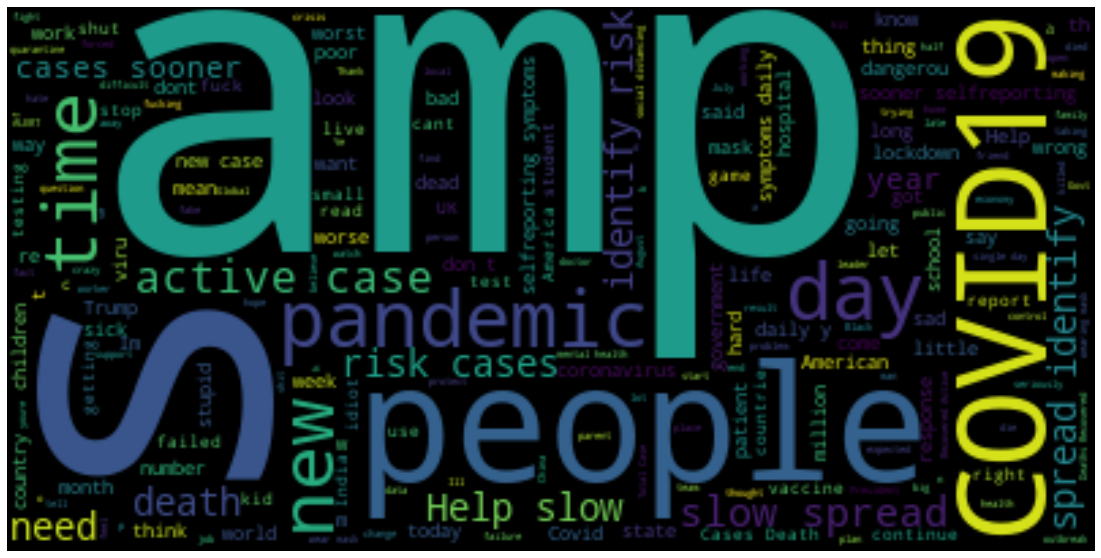

In [49]:

neg_docx = ' '.join(negative_tokens)

plot_wordcloud(neg_docx)